# Proyecto de segmentacion de clientes

## Objetivo del proyecto:

### Es necesario realizar una agrupación para resumir los segmentos de clientes.

## Contexto:

##### El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a la empresa a comprender mejor a sus clientes y les permite modificar los productos de acuerdo con las necesidades, los comportamientos y las inquietudes específicas de los diferentes tipos de clientes.

##### El análisis de la personalidad de los clientes ayuda a una empresa a modificar su producto en función de sus clientes objetivo de distintos tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto a todos los clientes de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo solo en ese segmento en particular.

## Contexto del dataset

<table border="1">
  <thead>
    <tr>
      <th>Categoría</th>
      <th>Descripción</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gente</td>
      <td></td>
    </tr>
    <tr>
      <td>ID</td>
      <td>Identificador único del cliente</td>
    </tr>
    <tr>
      <td>Year_Birth</td>
      <td>Año de nacimiento del cliente</td>
    </tr>
    <tr>
      <td>Educación</td>
      <td>Nivel de educación del cliente</td>
    </tr>
    <tr>
      <td>Marital_Status</td>
      <td>Estado civil del cliente</td>
    </tr>
    <tr>
      <td>Income</td>
      <td>Ingresos anuales del hogar del cliente</td>
    </tr>
    <tr>
      <td>Kidhome</td>
      <td>Número de niños en el hogar del cliente</td>
    </tr>
    <tr>
      <td>Teenhome</td>
      <td>Número de adolescentes en el hogar del cliente</td>
    </tr>
    <tr>
      <td>Dt_Customer</td>
      <td>Fecha de alta del cliente en la empresa</td>
    </tr>
    <tr>
      <td>Recency</td>
      <td>Número de días desde la última compra del cliente</td>
    </tr>
    <tr>
      <td>Complaint</td>
      <td>1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>Productos</td>
      <td></td>
    </tr>
    <tr>
      <td>MntWines</td>
      <td>Cantidad gastada en vino en los últimos 2 años</td>
    </tr>
    <tr>
      <td>MntFruits</td>
      <td>Monto gastado en frutas en los últimos 2 años</td>
    </tr>
    <tr>
      <td>MntMeatProducts</td>
      <td>Cantidad gastada en carne en los últimos 2 años</td>
    </tr>
    <tr>
      <td>MntFishProducts</td>
      <td>Cantidad gastada en pescado en los últimos 2 años</td>
    </tr>
    <tr>
      <td>MntSweetProducts</td>
      <td>Cantidad gastada en dulces en los últimos 2 años</td>
    </tr>
    <tr>
      <td>MntGoldProds</td>
      <td>Cantidad gastada en oro en los últimos 2 años</td>
    </tr>
    <tr>
      <td>Promoción</td>
      <td></td>
    </tr>
    <tr>
      <td>NumDealsPurchases</td>
      <td>Número de compras realizadas con descuento</td>
    </tr>
    <tr>
      <td>AcceptedCmp1</td>
      <td>1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>AcceptedCmp2</td>
      <td>1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>AcceptedCmp3</td>
      <td>1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>AcceptedCmp4</td>
      <td>1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>AcceptedCmp5</td>
      <td>1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>Respuesta</td>
      <td>1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario</td>
    </tr>
    <tr>
      <td>Lugar</td>
      <td></td>
    </tr>
    <tr>
      <td>NumWebPurchases</td>
      <td>Número de compras realizadas a través del sitio web de la empresa</td>
    </tr>
    <tr>
      <td>NumCatalogPurchases</td>
      <td>Número de compras realizadas mediante un catálogo</td>
    </tr>
    <tr>
      <td>NumStorePurchases</td>
      <td>Número de compras realizadas directamente en tiendas</td>
    </tr>
    <tr>
      <td>NumWebVisitsMonth</td>
      <td>Número de visitas al sitio web de la empresa en el último mes</td>
    </tr>
  </tbody>
</table>

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


## Importar las libreiras necesarias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler #importamos la funcion para escalar los valores numericos y que algunas variables no afecten el modelo por su mayor tamaño
from sklearn.decomposition import PCA # Importamos la funcion para hacer analisis de componentes principales

from sklearn.cluster import KMeans, AgglomerativeClustering # importamos los modelos de clustering que vamos a usar
from sklearn.metrics import silhouette_score # importamos la una de las pemtricas pricipales apara evaular los modelos de clustering
from scipy.cluster.hierarchy import dendrogram, linkage #importamos la visual de dendograma


In [ ]:
df_marketing = pd.read_csv('../Data/marketing_campaign.csv', delimiter="\t")

df_marketing.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
df_marketing.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Limpieza y estructuración de datos

In [ ]:
df_marketing.shape

(2240, 29)

In [ ]:
df_marketing.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df_marketing.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
# Validamos los registros del campo
df_marketing.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [ ]:
# Validamos los registros del campo
df_marketing.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [ ]:
# Copiamos el df para no modificar los datos originales
df=df_marketing.copy()

In [ ]:
# Eliminamos los registros antes identificados como nulos o vacios, ya que no representan una gran cantidad
df = df.dropna()

In [ ]:
# Se elimina el ID, ya que no sera necesario para nuestro modelo y 'Z_CostContact','Z_Revenue'ya que no se tiene contexto de estas variables de kaggel y tiene el mismo valor para todos los registros
df.drop(columns=['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)


In [ ]:
# identificamos campos que esten vacios pero no fueron identificados con el isnull()
for i in df.columns:
    val=len(df[df[i]==''])    
    if val > 0:
        print(f'columna {i}',' Registros vacios sin null:   ',val)


In [ ]:
# establesemos las columnas que vamos a cambiar de tipo de variable
col=['Year_Birth','Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response']


In [ ]:
df.head(5)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  04-09-2012       58       635         88  ...                   10   
1  08-03-2014       38        11          1  ...                    1   
2  21-08-2013       26       426         49  ...                    2   
3  10-02-2014       26        11          4  ...                    0   
4  19-01-2014       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

## Analisis exploratorio de datos EDA

In [ ]:
# Se Identifican los principales estaditicos de las variables nuemricas
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2216.000000  ...          2216.000000        2216.000000   
mean          27.028881  ...             2.671029           5.800993   
std           41.072046  ...             2.926734           3.250785   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          262.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.009477     0.150271  
std        0.244950      0.115588     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

### Analisamos datos atipicos de las variables numericas exceptuando las binarias

In [ ]:
col_iter=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

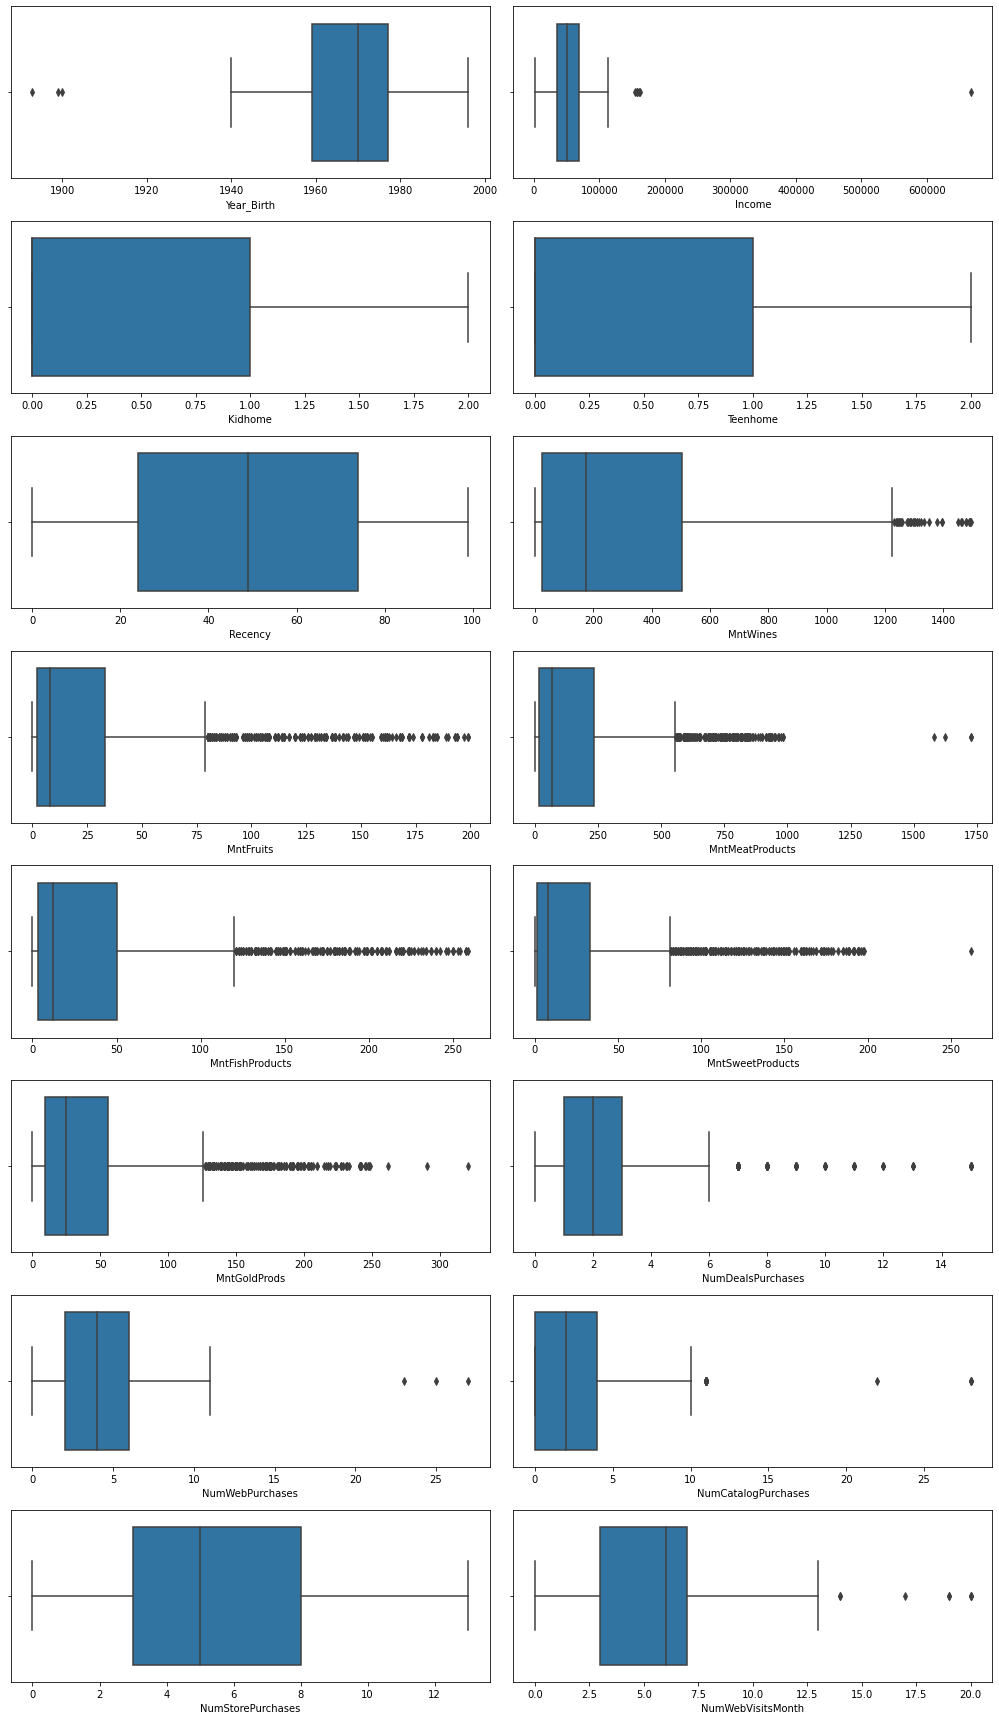

In [ ]:
# Crea una cuadrícula de subgráficos con 8 filas y 2 columnas, ajusta el tamaño de la figura si es necesario
fig, ax = plt.subplots(8, 2, figsize=(14, 24))

# Itera sobre cada columna especificada en col_iter
for i, col in enumerate(col_iter): 
    # Crea un diagrama de caja (boxplot) para la columna actual (col) usando la función boxplot de seaborn
    # x especifica la columna a graficar, data especifica el DataFrame a utilizar
    # ax=ax.flatten()[i] especifica el subgráfico a utilizar para el boxplot actual
    sns.boxplot(x=col, data=df, ax=ax.flatten()[i])

# Ajusta el diseño para evitar la superposición de subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()

<h4> Se identifican outliers estadisticos, pero sobre todo de negocio y de logica, en los cuales se identifican clientes con fechas de nacimiento incoerentes, o que no reflejan un grupo de clientes utiles para la actualidad, y un registro con  ingresos muy elevados (en comparacion), con un valor de 666666, da a suponer que fue un valor generico que se registro. se proceden a eliminar los registros ya que no representan un volumen considerable en el df pero es importante resaltar que este tipo de ajustes se debe aclarar con el negocio en un escenario real.

Con los demas outliers estadisticos se consideran necesarios para el modelo, ya que pueden ser comportamientos naturales de los clientes, aunque estadisticamente atipicos</h4>

In [ ]:
# Se filtran en el df para sol tener en cunenta los registros que tengan ingresos inferiores a 600000 y con un año de nacimiento superior a 1900 
df=df[(df['Year_Birth']>1900)&(df['Income']<600000)]

In [ ]:
# Se Revisa la cantidad de registros resultantes luego de aplicar los filtros previos 
df.shape

(2212, 26)

### Analisar las misma variables post filtrado de outliers

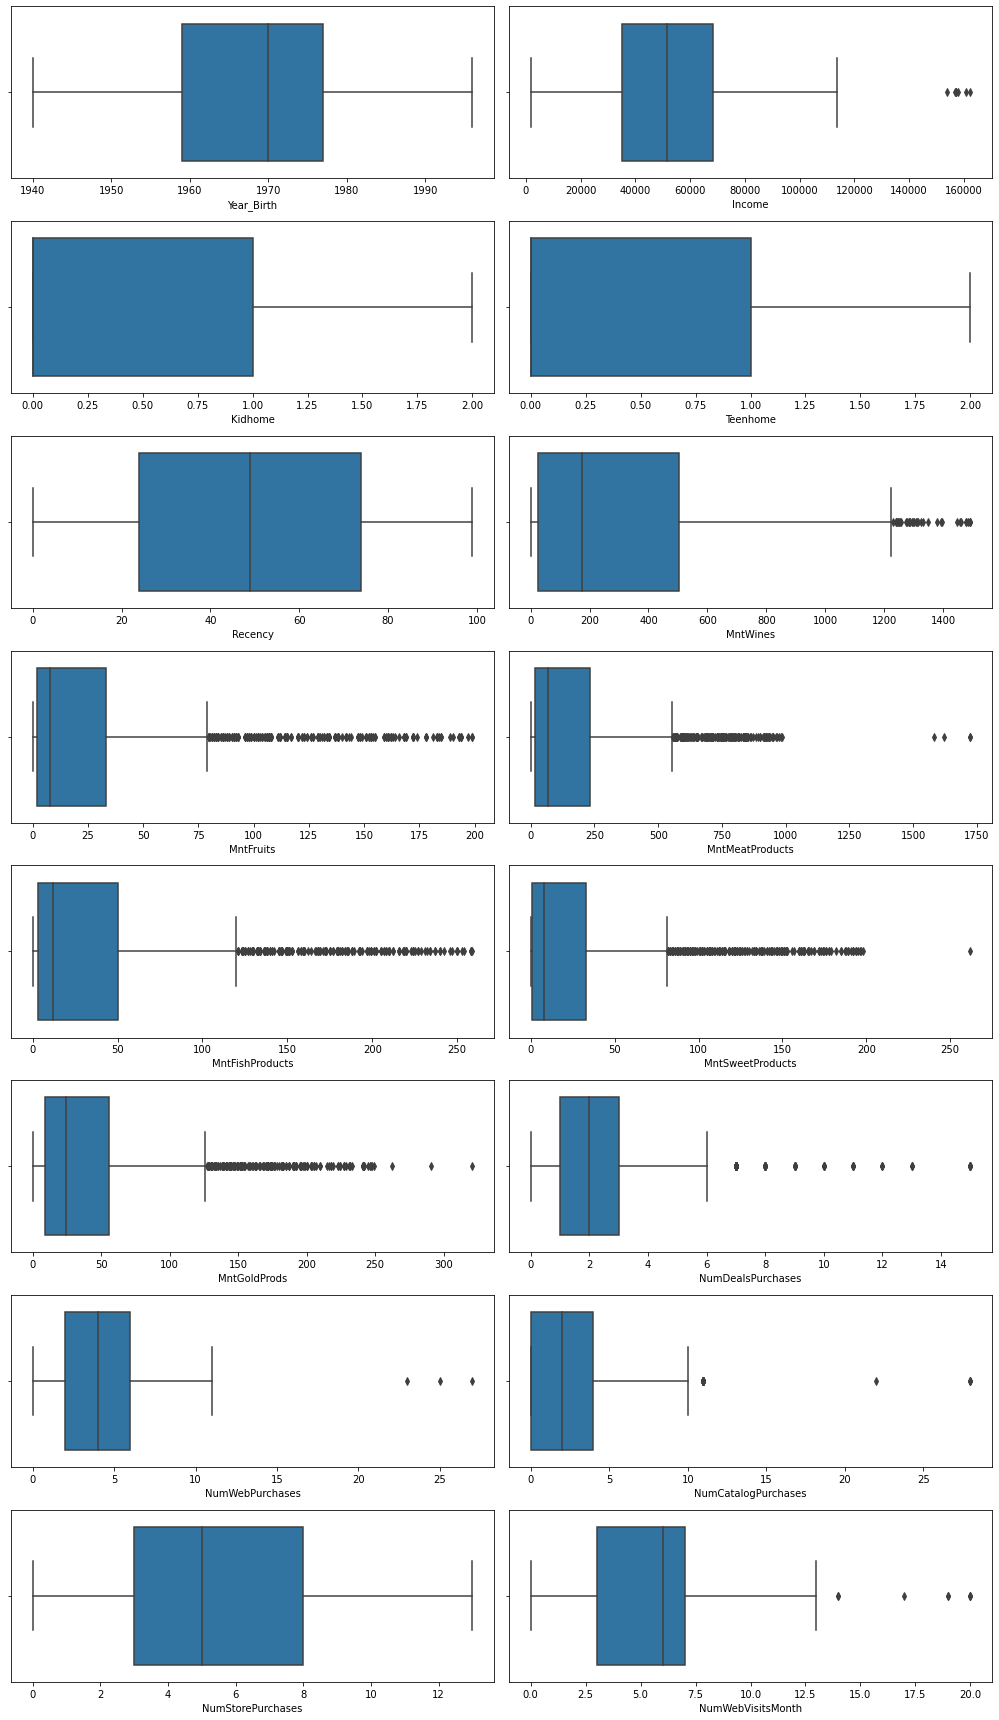

In [ ]:
# Crea una cuadrícula de subgráficos con 8 filas y 2 columnas, ajusta el tamaño de la figura si es necesario
fig, ax = plt.subplots(8, 2, figsize=(14, 24))

# Itera sobre cada columna especificada en col_iter
for i, col in enumerate(col_iter): 
    # Crea un diagrama de caja (boxplot) para la columna actual (col) usando la función boxplot de seaborn
    # x especifica la columna a graficar, data especifica el DataFrame a utilizar
    # ax=ax.flatten()[i] especifica el subgráfico a utilizar para el boxplot actual
    sns.boxplot(x=col, data=df, ax=ax.flatten()[i])

# Ajusta el diseño para evitar la superposición de subgráficos
plt.tight_layout()

plt.show()

### Se crea variables categorias como la generación, que pueden ayudarnos a crear grupos y a relacionar el comportameinto de una generacion con el de nuestros clientes

In [ ]:
# Funcion que asigna la generacion a partir el año de nacimiento 
def determinar_generacion(año):
    if 1900 <= año <= 1914:
        return '1_Generación Interbellum_1900 a 1914'
    elif 1915 <= año <= 1925:
        return '2_Generación Grandiosa_1915 a 1925'
    elif 1926 <= año <= 1945:
        return '3_Generación Silenciosa_1946 a 1964'
    elif 1946 <= año <= 1964:
        return '4_Baby Boomers_1946 a 1964'
    elif 1965 <= año <= 1980:
        return '5_Generación X_1965 a 1980'
    elif 1981 <= año <= 1996:
        return '6_Generación Y o Millennials_1981 a 1996'
    elif 1997 <= año <= 2012:
        return '7_Generación Z_1997 a 2012'
    elif año >= 2013:
        return '8_Generación Alpha_mayor a 2012'
    else:
        return 'Desconocida'

In [ ]:
# Creacion del campo de generacion y aplicacion de la funcion de asigancion de generacion
df['generacion']=df['Year_Birth'].apply(determinar_generacion)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0  04-09-2012       58       635         88  ...                  4   
1  08-03-2014       38        11          1  ...                  2   
2  21-08-2013       26       426         49  ...                 10   
3  10-02-2014       26        11          4  ...                  4   
4  19-01-2014       94       173         43  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response                                generacion  
0             0         0         1                4_Baby Boomers_1946 a 1964  
1             0         0         0                4_Baby Boomers_1946 a 1964  
2             0         0         0                5_Generación X_1965 a 1980  
3             0         0         0  6_Generación Y o Millennials_1981 a 1996  
4             0         0         0  6_Generación Y o Millennials_1981 a 1996  

[5 rows x 27 columns]

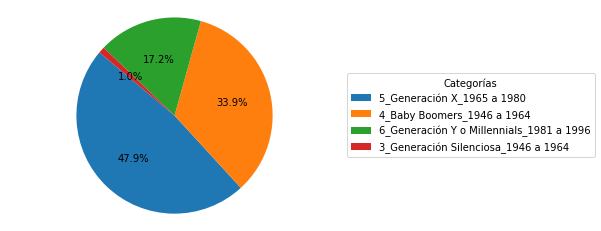

In [ ]:
# Contar las frecuencias de cada categoría en la columna 'Categoría'
counts = df.generacion.value_counts()

# Extraer etiquetas y tamaños
labels = counts.index
sizes = counts.values

# Crear gráfico de torta
# fig = plt.figure(figsize=(10,15), facecolor='red')
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

# Añadir leyenda
ax.legend(wedges, labels, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Asegurar que el gráfico es un círculo
ax.axis('equal')

plt.show()


#### Generacion como variable numerica

In [ ]:
# Funcion para asignar la generacion de forma numerica a partir de su año de nacimiento
def determinar_generacion_num(año):
    if 1900 <= año <= 1914:
        return 1
    elif 1915 <= año <= 1925:
        return 2
    elif 1926 <= año <= 1945:
        return 3
    elif 1946 <= año <= 1964:
        return 4
    elif 1965 <= año <= 1980:
        return 5
    elif 1981 <= año <= 1996:
        return 6
    elif 1997 <= año <= 2012:
        return 7
    elif año >= 2013:
        return 8
    else:
        return 9

In [ ]:
# Creacion del cmpao generacion_num y aplicacion de la funcion de asigancion de generacion numerica
df['generacion_num']=df['Year_Birth'].apply(determinar_generacion_num)
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  04-09-2012       58       635         88  ...                  7   
1  08-03-2014       38        11          1  ...                  5   
2  21-08-2013       26       426         49  ...                  4   
3  10-02-2014       26        11          4  ...                  6   
4  19-01-2014       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response                                generacion  \
0         0         1                4_Baby Boomers_1946 a 1964   
1         0         0                4_Baby Boomers_1946 a 1964   
2         0         0                5_Generación X_1965 a 1980   
3         0         0  6_Generación Y o Millennials_1981 a 1996   
4         0         0  6_Generación Y o Millennials_1981 a 1996   

   generacion_num  
0               4  
1               4  
2               5  
3               6  
4               6  

[5 rows x 28 columns]

### Se crea una nueva varibale que agrupe la informacion sobre si el cliente tiene hijos

In [ ]:
df['tiene_hijos'] = df.apply(lambda row: 1 if row['Kidhome'] >= 1 or row['Teenhome'] >= 1 else 0, axis=1)

### Se crea una nueva variable la cual consolide la catidad de compras que a realizado un cliente en los ultimos 2 años

In [ ]:
df['Cantidad_compras_totales']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Cantidad_compras_totales']]

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      Cantidad_compras_totales  
0                           22  
1                            4  
2                           20  
3                            6  
4                           14  
...                        ...  
2235                        16  
2236                        15  
2237                        18  
2238                        21  
2239                         8  

[2212 rows x 4 columns]

### Se crea una variable la cual consolida la cantidad de campañas que el cliente a aceptado

In [ ]:
# Lista de columnas relevantes
columnas_descuentos = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Crear la nueva columna sumando las columnas relevantes
df['capañas_aplicadas'] = df[columnas_descuentos].sum(axis=1)


### Analisamos las coorelaciones entre las variables numericas de interes

In [ ]:
# seleccionamos las variables que queremos visulizar en el heatmap
col_iter=['generacion_num','Year_Birth', 'Income', 'Kidhome','Teenhome','tiene_hijos', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','Cantidad_compras_totales','NumWebVisitsMonth','capañas_aplicadas']

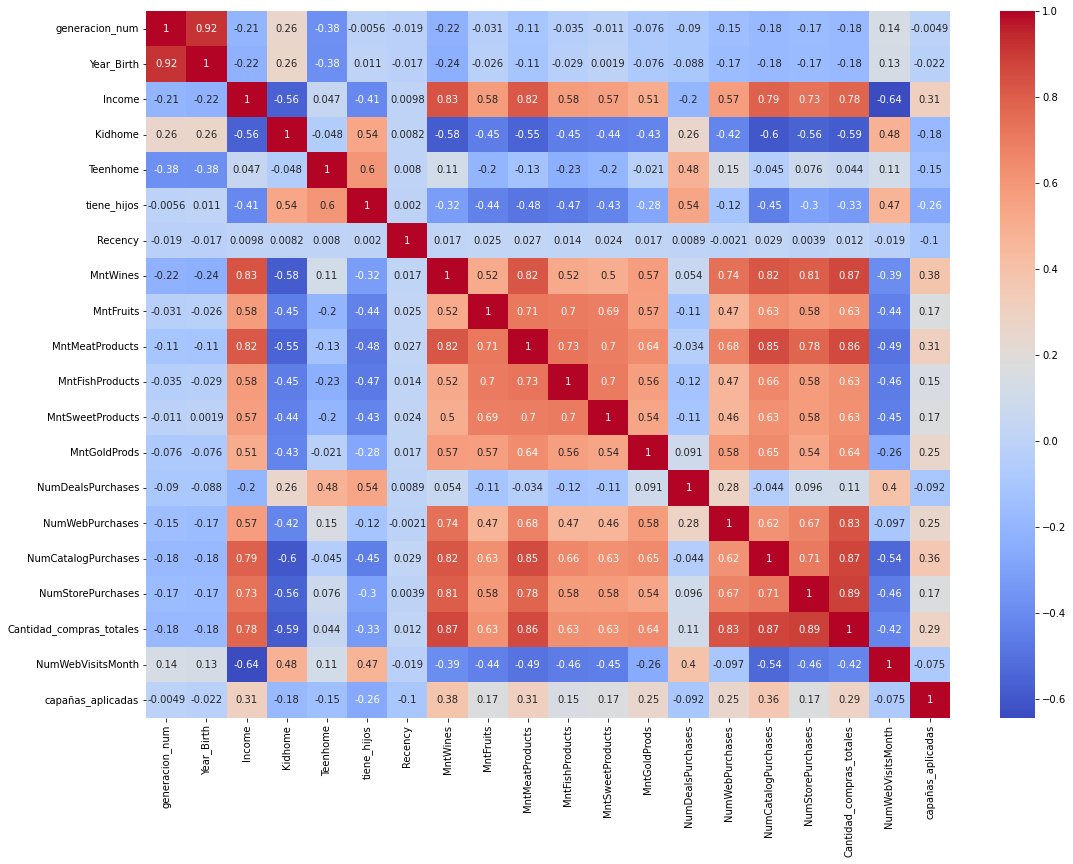

In [ ]:
# Impresion del heatmap de correlaciones
fig= plt.figure(figsize=(18,13))
sns.heatmap(df[col_iter].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

<h4> Seria interersante identificar la cantidad de tipos de prodcuto como vinos o carnes por cada uno de los diferentes canales, y llegar a idetificar si los clientes prefiren adquirir un tipo de producto por un canal en espesifico, de forma cuantificable, pero por la forma de la estructura de los datos y el no relacionamiento de los tipos de prodcutos y los canales de compra, no es posibles. Lo anterior solo se logra llegara identificar indirectamente con el mapa de correlaciones antes analizado, Donde podemos identificar a mayor compra de los diferentes tipos de priducto en cual de los los canales (tienda, catalogo o web) se generan mas compras. Pero siguiendo con los analisis: 

### Analisis por ingresos

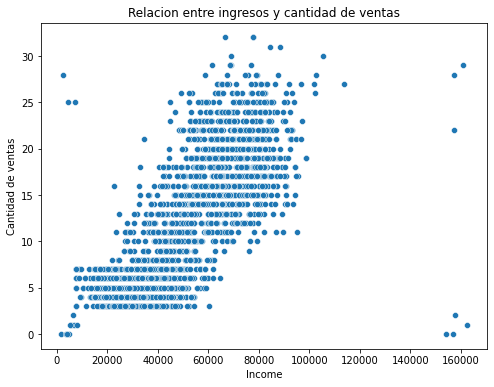

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income',y='Cantidad_compras_totales')
plt.title('Relacion entre ingresos y cantidad de ventas')
plt.ylabel('Cantidad de ventas')
plt.show()

In [ ]:
df.groupby('Marital_Status').sum().reset_index()

Marital_Status  Year_Birth      Income  Kidhome  Teenhome  Recency  \
0         Absurd        3950    144731.0        0         0      106   
1          Alone        5919    131367.0        3         2       91   
2       Divorced      454276  12220901.0       95       137    11382   
3        Married     1687920  44328307.0      389       438    41402   
4         Single      926717  23958628.0      215       188    23150   
5       Together     1123643  29759493.0      257       303    28585   
6          Widow      148866   4292598.0       18        49     3709   
7           YOLO        3946     96864.0        0         2        6   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp4  \
0       711        169              625              411  ...             0   
1       554         12               79               23  ...             0   
2     75349       6357            34840             8123  ...            18   
3    256976      21981           137888            30395  ...            62   
4    137209      12840            87059            18255  ...            32   
5    175951      14454            94794            22271  ...            42   
6     27902       2422            14085             3793  ...            10   
7       644          6              100                8  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             1             1             0         0         1   
1             0             0             0         0         1   
2            13            12             5         1        48   
3            66            62             7         8        98   
4            31            30             5         6       106   
5            43            32            12         5        60   
6             7             5             1         0        18   
7             0             0             0         0         1   

   generacion_num  tiene_hijos  Cantidad_compras_totales  capañas_aplicadas  
0              10            0                        35                  3  
1              15            3                        29                  2  
2            1071          173                      2965                116  
3            4156          628                     10768                358  
4            2337          304                      5725                242  
5            2722          420                      7163                226  
6             324           50                      1085                 45  
7              10            2                        28                  1  

[8 rows x 28 columns]

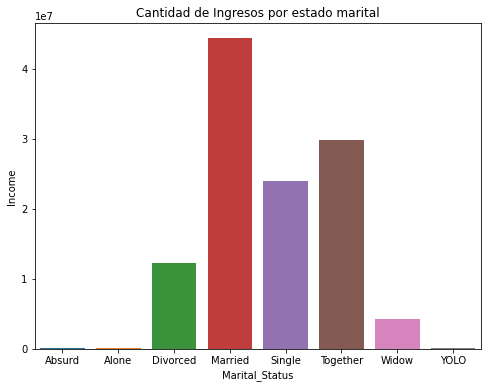

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby('Marital_Status').sum().reset_index(),
            x='Marital_Status'
            ,y='Income'
            ,ci=None
        )
plt.title('Cantidad de Ingresos por estado marital')
plt.show()

### Analisis por generacion

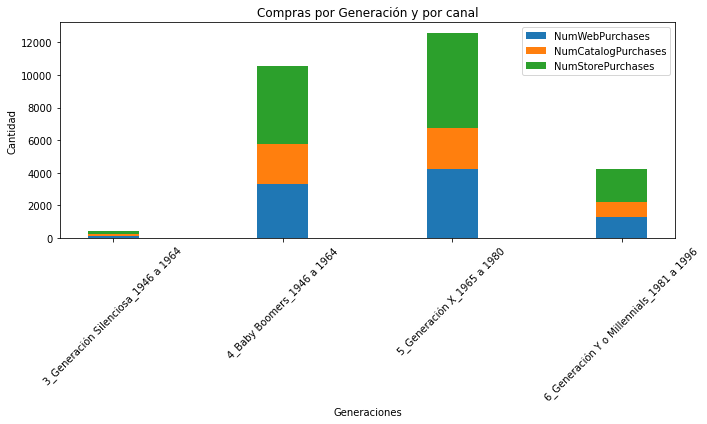

In [ ]:
# df agrupada por la generacion sobre  la cantidad de ventas en los diferentes canales
df_plt=df.groupby('generacion').sum()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].reset_index()

generacion = df_plt['generacion'].unique()
NumWebPurchases = df_plt['NumWebPurchases']
NumCatalogPurchases = df_plt['NumCatalogPurchases']
NumStorePurchases = df_plt['NumStorePurchases']

fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(generacion))
bar_width = 0.3

p1 = ax.bar(index, NumWebPurchases, bar_width, label='NumWebPurchases')
p2 = ax.bar(index, NumCatalogPurchases, bar_width, bottom=NumWebPurchases, label='NumCatalogPurchases')
p3 = ax.bar(index, NumStorePurchases, bar_width, bottom=np.array(NumWebPurchases) + np.array(NumCatalogPurchases), label='NumStorePurchases')

ax.set_xlabel('Generaciones')
ax.set_ylabel('Cantidad')
ax.set_title('Compras por Generación y por canal')
ax.set_xticks(index)
ax.set_xticklabels(generacion, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Creamos df con los la cantidad de produtos vendidos por generacion 

df_MntFruits = df[['MntFruits','generacion']].groupby('generacion').sum().reset_index()
df_MntMeatProducts = df[['MntMeatProducts','generacion']].groupby('generacion').sum().reset_index()
df_MntWines = df[['MntWines','generacion']].groupby('generacion').sum().reset_index()
df_MntFishProducts = df[['MntFishProducts','generacion']].groupby('generacion').sum().reset_index()
df_MntSweetProducts = df[['MntSweetProducts','generacion']].groupby('generacion').sum().reset_index()
df_MntGoldProds = df[['MntGoldProds','generacion']].groupby('generacion').sum().reset_index()


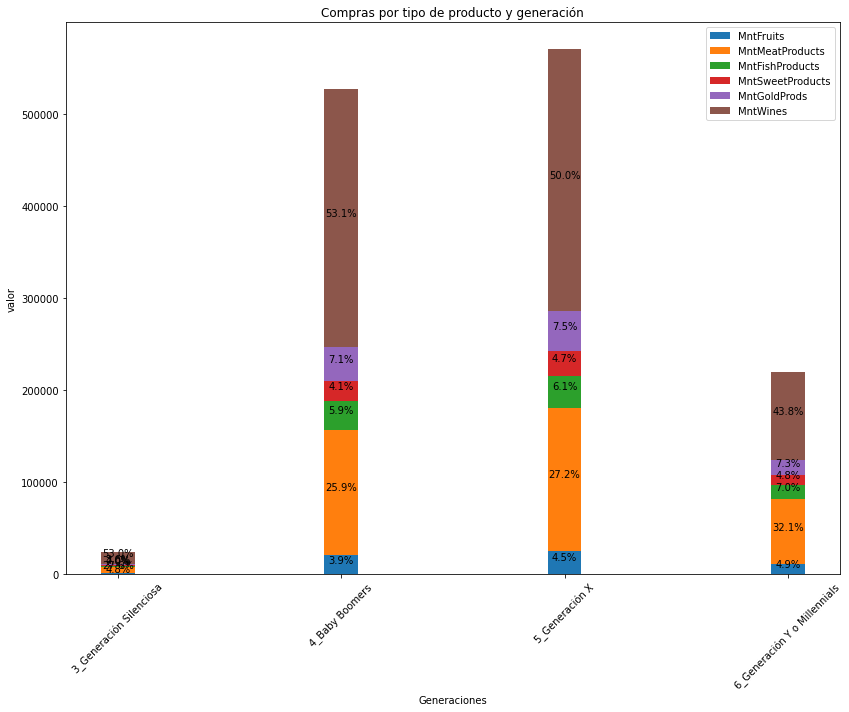

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del DataFrame
generacion = ['3_Generación Silenciosa', '4_Baby Boomers', '5_Generación X', '6_Generación Y o Millennials']
MntFruits = df_MntFruits['MntFruits'].values
MntMeatProducts = df_MntMeatProducts['MntMeatProducts'].values
MntFishProducts = df_MntFishProducts['MntFishProducts'].values
MntSweetProducts = df_MntSweetProducts['MntSweetProducts'].values
MntGoldProds = df_MntGoldProds['MntGoldProds'].values
MntWines = df_MntWines['MntWines'].values

totals = MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds + MntWines

fig, ax = plt.subplots(figsize=(12, 10))

index = np.arange(len(generacion))
bar_width = 0.15

p1 = ax.bar(index, MntFruits, bar_width, label='MntFruits')
p2 = ax.bar(index, MntMeatProducts, bar_width, bottom=MntFruits, label='MntMeatProducts')
p3 = ax.bar(index, MntFishProducts, bar_width, bottom=MntFruits + MntMeatProducts, label='MntFishProducts')
p4 = ax.bar(index, MntSweetProducts, bar_width, bottom=MntFruits + MntMeatProducts + MntFishProducts, label='MntSweetProducts')
p5 = ax.bar(index, MntGoldProds, bar_width, bottom=MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts, label='MntGoldProds')
p6 = ax.bar(index, MntWines, bar_width, bottom=MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds, label='MntWines')

ax.set_xlabel('Generaciones')
ax.set_ylabel('valor')
ax.set_title('Compras por tipo de producto y generación')
ax.set_xticks(index)
ax.set_xticklabels(generacion, rotation=45)
ax.legend()

# Agregar etiquetas de porcentajes
def add_labels(rects, heights, totals):
    for rect, height, total in zip(rects, heights, totals):
        height_accumulated = rect.get_height()
        percentage = (height_accumulated / total) * 100
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_y() + height_accumulated / 2,
            f'{percentage:.1f}%',
            ha='center',
            va='bottom'
        )

add_labels(p1, MntFruits, totals)
add_labels(p2, MntFruits + MntMeatProducts, totals)
add_labels(p3, MntFruits + MntMeatProducts + MntFishProducts, totals)
add_labels(p4, MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts, totals)
add_labels(p5, MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds, totals)
add_labels(p6, MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds + MntWines, totals)

plt.tight_layout()
plt.show()


<h4>Las ventas de cada tipo de producto son proporcionales en cada generacion, es decir, que se identifica que para las 4 generaciones el top 1 en ventas son los vinos,el top 2 son los productos de carnes y el 3 el oro, lo que indica que no hay una fuerte diferenciacion en cosumo de productos por generacion</h4>

### Analisis por campaña(descuento)

In [ ]:
df[df['MntWines']==0].head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
136        1976       Basic       Divorced   9548.0        1         0   
233        1951  Graduation         Single  15033.0        0         0   
444        1974    2n Cycle        Married  20130.0        0         0   
445        1959  Graduation       Divorced  23295.0        0         0   
738        1989       Basic        Married  17487.0        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp5  \
136  08-08-2012       31         0          1  ...             0   
233  16-04-2014       37         0          4  ...             0   
444  17-03-2014       99         0          6  ...             0   
445  13-07-2013       72         0          0  ...             0   
738  18-03-2013       37         0          0  ...             0   

     AcceptedCmp1  AcceptedCmp2  Complain  Response  \
136             0             0         0         0   
233             0             0         0         0   
444             0             0         0         0   
445             0             0         0         0   
738             0             0         0         0   

                                   generacion  generacion_num  tiene_hijos  \
136                5_Generación X_1965 a 1980               5            1   
233                4_Baby Boomers_1946 a 1964               4            0   
444                5_Generación X_1965 a 1980               5            0   
445                4_Baby Boomers_1946 a 1964               4            0   
738  6_Generación Y o Millennials_1981 a 1996               6            1   

     Cantidad_compras_totales  capañas_aplicadas  
136                         4                  0  
233                         4                  0  
444                         4                  0  
445                         3                  0  
738                         3                  0  

[5 rows x 31 columns]

In [ ]:
# df['compra_vino']=df['MntWines'].apply(lambda x: 1 if x>0 else 0 )

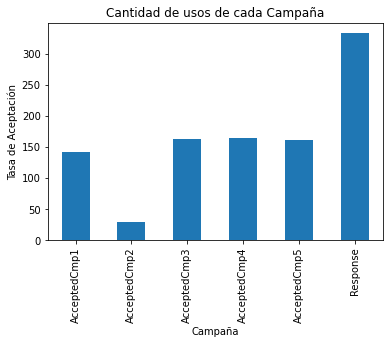

In [ ]:
# Se Identifican los cmapos correspondientes a la cantidad de campañas usadas 
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response'] 

# Bisual de la cantidad de usos de cada campaña
df_MntWines_campaigns=df[campaigns].sum().plot(kind='bar')
plt.title('Cantidad de usos de cada Campaña')
plt.xlabel('Campaña')
plt.ylabel('Tasa de Aceptación')
plt.show()


In [ ]:
# Creamos df con los la cantidad de produtos vendidos por tipo de descuento 

df_AcceptedCmp1 = df[['AcceptedCmp1','generacion']].groupby('generacion').sum().reset_index()
df_AcceptedCmp2 = df[['AcceptedCmp2','generacion']].groupby('generacion').sum().reset_index()
df_AcceptedCmp3 = df[['AcceptedCmp3','generacion']].groupby('generacion').sum().reset_index()
df_AcceptedCmp4 = df[['AcceptedCmp4','generacion']].groupby('generacion').sum().reset_index()
df_AcceptedCmp5 = df[['AcceptedCmp5','generacion']].groupby('generacion').sum().reset_index()
df_Response = df[['Response','generacion']].groupby('generacion').sum().reset_index()



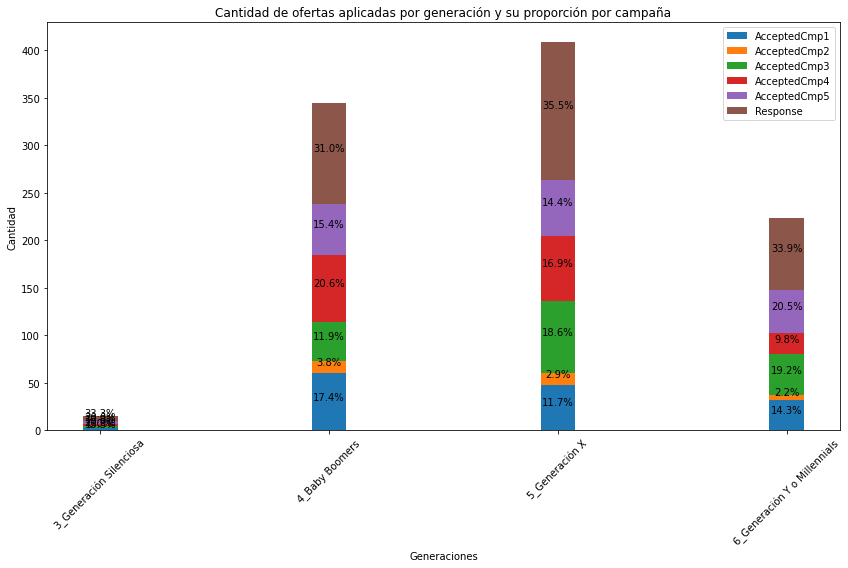

In [ ]:

# Datos del DataFrame
generacion = ['3_Generación Silenciosa', '4_Baby Boomers', '5_Generación X', '6_Generación Y o Millennials']
AcceptedCmp = [
    df_AcceptedCmp1['AcceptedCmp1'].values,
    df_AcceptedCmp2['AcceptedCmp2'].values,
    df_AcceptedCmp3['AcceptedCmp3'].values,
    df_AcceptedCmp4['AcceptedCmp4'].values,
    df_AcceptedCmp5['AcceptedCmp5'].values,
    df_Response['Response'].values
]

totals = np.sum(AcceptedCmp, axis=0)

fig, ax = plt.subplots(figsize=(12, 8))

index = np.arange(len(generacion))
bar_width = 0.15

bottom = np.zeros(len(generacion))
labels = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
bars = []

for i in range(len(AcceptedCmp)):
    bar = ax.bar(index, AcceptedCmp[i], bar_width, bottom=bottom, label=labels[i])
    bottom += AcceptedCmp[i]
    bars.append(bar)

ax.set_xlabel('Generaciones')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de ofertas aplicadas por generación y su proporción por campaña')
ax.set_xticks(index)
ax.set_xticklabels(generacion, rotation=45)
ax.legend()

# Agregar etiquetas de porcentajes
def add_labels(rects, heights, totals):
    for rect, height, total in zip(rects, heights, totals):
        height_accumulated = rect.get_height()
        percentage = (height_accumulated / total) * 100
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_y() + height_accumulated / 2,
            f'{percentage:.1f}%',
            ha='center',
            va='bottom'
        )

for i in range(len(bars)):
    cumulative_heights = np.sum(AcceptedCmp[:i+1], axis=0)
    add_labels(bars[i], cumulative_heights, totals)

plt.tight_layout()
plt.show()


<h4>Identificamos ciertas diferencias entre la adopcion de las campañas y las diferentes generaciones, donde:
<li> La genera cion X tuvo una mayor adopcion por la ultima campaña, 3 y 4, en ese orden</li> 
<li> La generacion de baby boomers tuvo una mayor adopcion por la ultima campaña, 4 y 1, en ese orden</li>
<li> La generacion Y o milenials, tuvo una mayor adopcion por la ultima campaña, 5 y 3, en ese orden</li>

Lo cual en dado caso de hacer nuevas campañas pensadas en un segmento por edad de nuestros clientes, puede ser informacion de valor para segmentar la comunicacion de estas campañas por sus canales, linea de diseño, y la dinamica de la misma campaña en si
</h4>

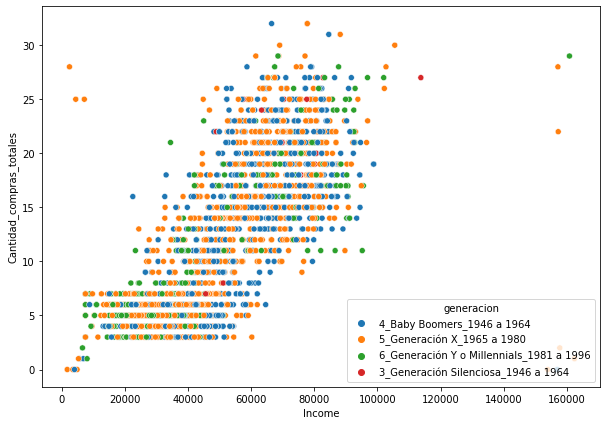

In [ ]:
fig= plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Income'],y=df['Cantidad_compras_totales'], hue=df['generacion'])
plt.show()

<h4> Debido a que desde un principio se queria evaluar el comportamiento de los clientes desde sus rangos de edad, en este caso las generaciones, y se evidencio que el comportaminto de sus compras en los diferentes tipos de productos y en los descuentos no llegaban a tener una correlación importante con la generacion, se procedio a analizar a detalle las generaciones por el consumo de los tipos de productos y en las campañas de descuento por unidades, y tampoco se llega a evidenciar un comportamiento el cual aportara a identficar que la edad o la generacion influyera en una segmentacion de los clientes  </h4>

### Analizando el Vino por Top producto de ventas

In [ ]:
# Lista de las columnas relevantes
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calcular el total de ventas
total_ventas = df[columns].sum().sum()

# Calcular el porcentaje de cada producto
pie = (df[columns].sum().sort_values(ascending=False) / total_ventas) * 100


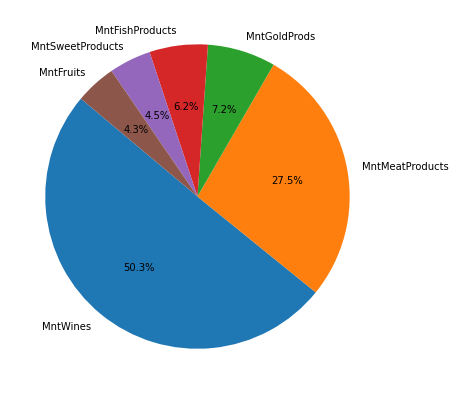

In [ ]:
plt.figure(figsize=(10, 7), facecolor='white')
plt.pie(
    pie,
    labels=pie.index,
    autopct='%1.1f%%', 
    startangle=140
)
plt.show()

In [ ]:
df.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# creamos una variable que agrupe a los clientes que estan casados o tiene una pareja, y en otro grupo los q no
df['tiene_pareja']=df['Marital_Status'].apply(lambda x: "Pareja" if x in (['Married','Together']) else "soltero")
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
0  04-09-2012       58       635         88  ...             0             0   
1  08-03-2014       38        11          1  ...             0             0   
2  21-08-2013       26       426         49  ...             0             0   
3  10-02-2014       26        11          4  ...             0             0   
4  19-01-2014       94       173         43  ...             0             0   

   Complain  Response                                generacion  \
0         0         1                4_Baby Boomers_1946 a 1964   
1         0         0                4_Baby Boomers_1946 a 1964   
2         0         0                5_Generación X_1965 a 1980   
3         0         0  6_Generación Y o Millennials_1981 a 1996   
4         0         0  6_Generación Y o Millennials_1981 a 1996   

   generacion_num  tiene_hijos  Cantidad_compras_totales  capañas_aplicadas  \
0               4            0                        22                  1   
1               4            1                         4                  0   
2               5            0                        20                  0   
3               6            1                         6                  0   
4               6            1                        14                  0   

   tiene_pareja  
0       soltero  
1       soltero  
2        Pareja  
3        Pareja  
4        Pareja  

[5 rows x 32 columns]

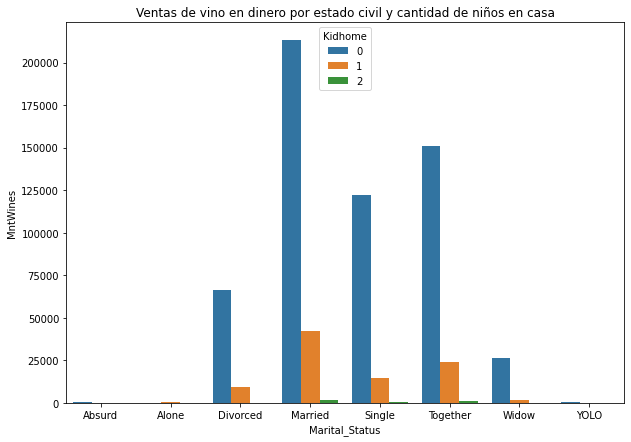

In [ ]:
# Agrupar y sumar los datos
grouped_data = df.groupby(['Marital_Status', 'Kidhome']).sum()['MntWines'].reset_index()

# Ordenar los datos por la columna 'MntWines' de forma ascendente
sorted_data = grouped_data.sort_values(by='Marital_Status', ascending=True)

# Crear el gráfico de barras ordenado
fig = plt.figure(figsize=(10, 7))
sns.barplot(
    data=sorted_data,
    x='Marital_Status',
    y='MntWines',
    hue='Kidhome',
    ci=None
)
plt.title('Ventas de vino en dinero por estado civil y cantidad de niños en casa')
plt.show()


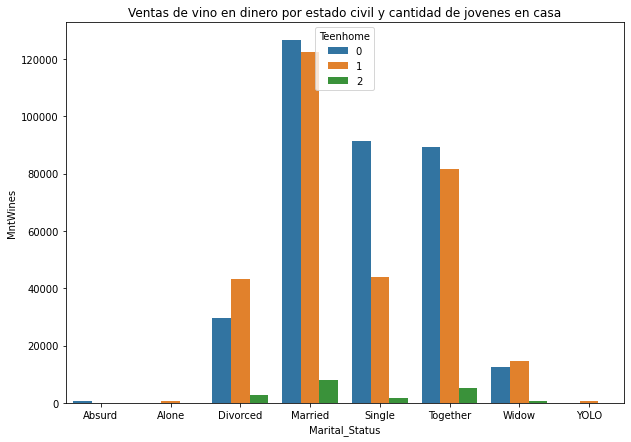

In [ ]:
# Agrupar y sumar los datos
grouped_data = df.groupby(['Marital_Status', 'Teenhome']).sum()['MntWines'].reset_index()

# Ordenar los datos por la columna 'MntWines' de forma ascendente
sorted_data = grouped_data.sort_values(by='Marital_Status', ascending=True)

# Crear el gráfico de barras ordenado
fig = plt.figure(figsize=(10, 7))
sns.barplot(
    data=sorted_data,
    x='Marital_Status',
    y='MntWines',
    hue='Teenhome',
    ci=None
)
plt.title('Ventas de vino en dinero por estado civil y cantidad de jovenes en casa')
plt.show()

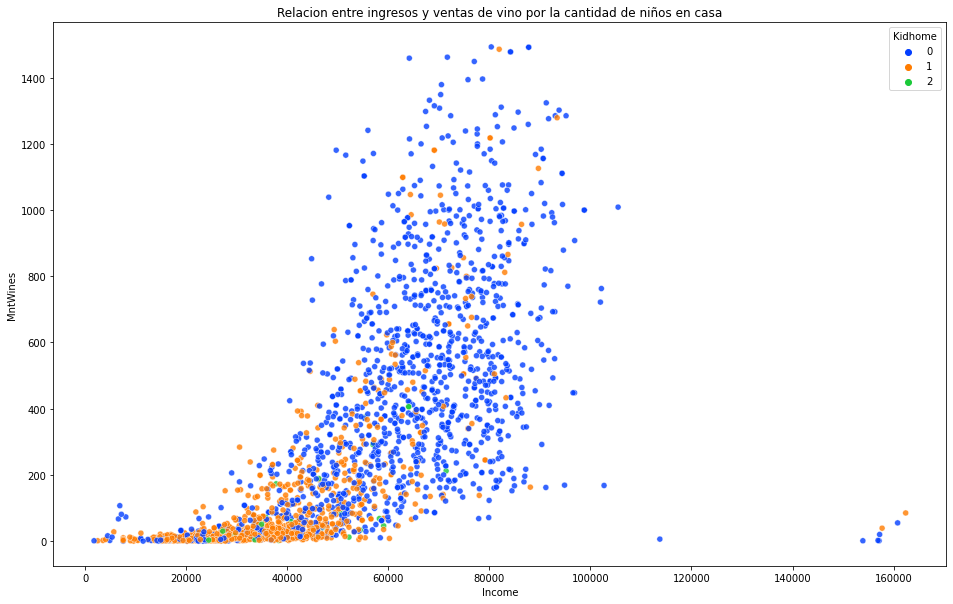

In [ ]:
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df['Income'],
    y=df['MntWines'],
    hue=df['Kidhome'],
    palette='bright',
    alpha=0.8)
plt.title('Relacion entre ingresos y ventas de vino por la cantidad de niños en casa')
plt.show()

In [ ]:
df_=df.copy()
df_['total productos']=df_[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
# df_.groupby(['k-means_pca','Kidhome']).sum().reset_index()[['k-means_pca','Kidhome','total productos']]

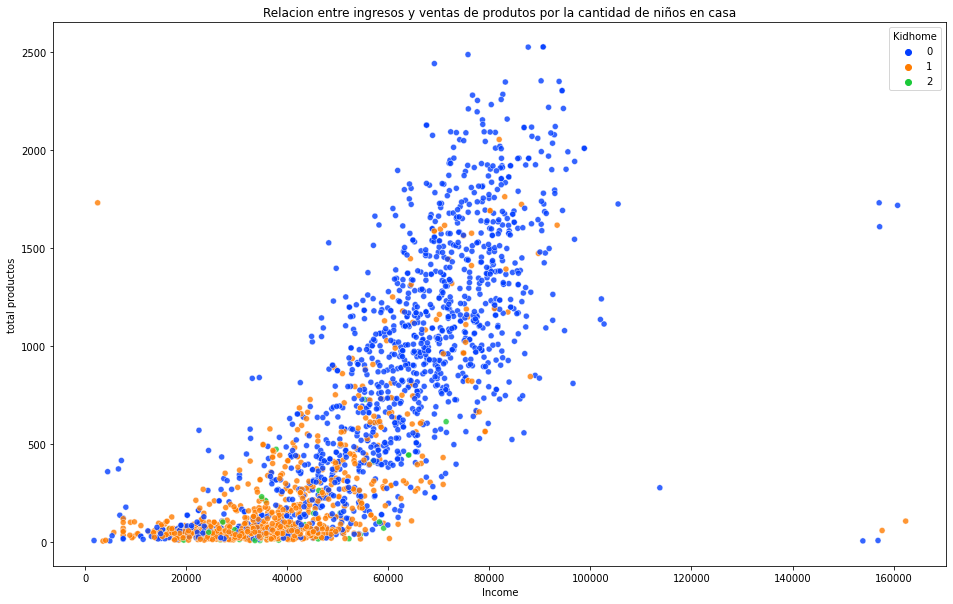

In [ ]:
fig = plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df_['Income'],
    y=df_['total productos'],
    hue=df['Kidhome'],
    palette='bright',
    alpha=0.8)
plt.title('Relacion entre ingresos y ventas de produtos por la cantidad de niños en casa')
plt.show()

<h5><b>De las anteriores visuales se puede inferir que la mayoria de clientes disminuyen sus compras cuando tiene niños en casa, pero si tienen jovenes en casa, esto no influye en su decision de compra, a menos de que tengan 2 jovenes o mas</b></h5>

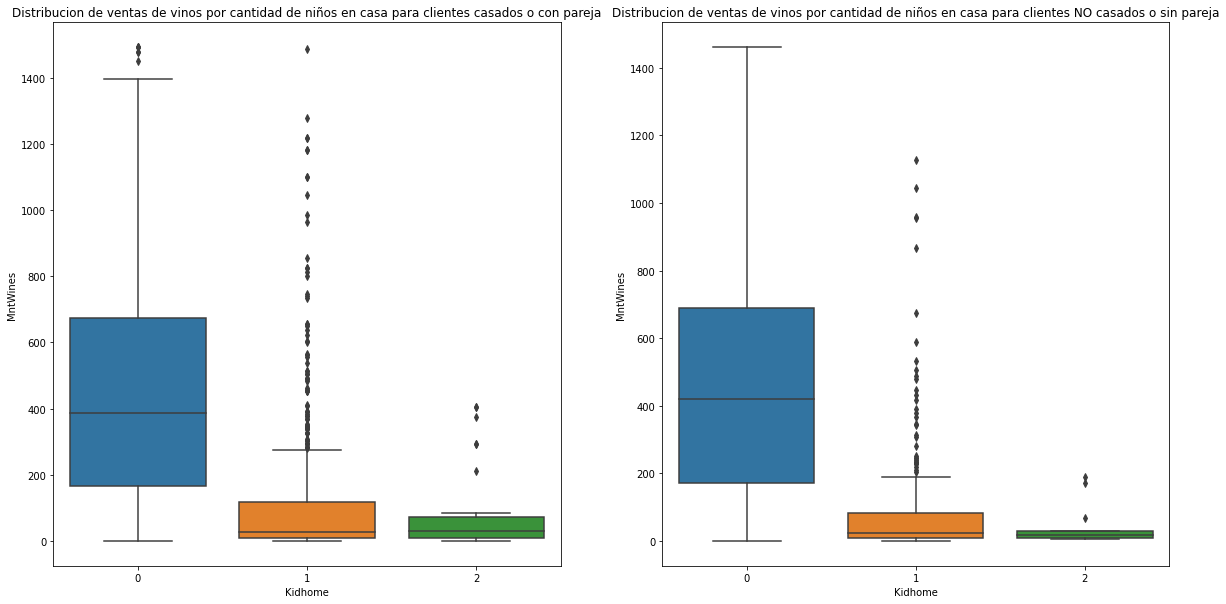

In [ ]:
# Crear una figura con dos subtramas (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.boxplot(
    data=df[df['tiene_pareja']=="Pareja"],
    y='MntWines',
    x='Kidhome',
    ax=axs[0])
axs[0].set_title('Distribucion de ventas de vinos por cantidad de niños en casa para clientes casados o con pareja')

sns.boxplot(
    data=df[df['tiene_pareja']=="soltero"],
    y='MntWines',
    x='Kidhome',
    ax=axs[1])
axs[1].set_title('Distribucion de ventas de vinos por cantidad de niños en casa para clientes NO casados o sin pareja')
plt.show()

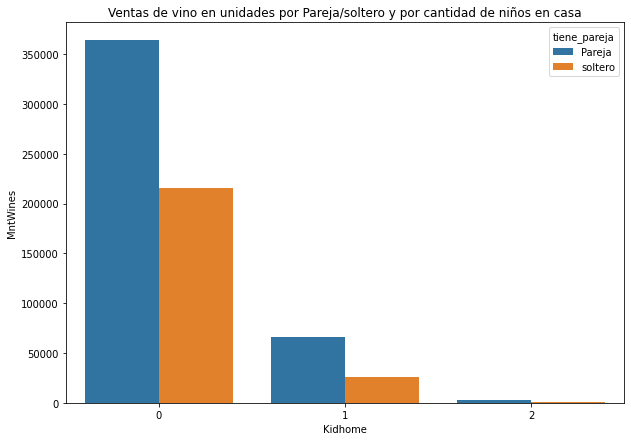

In [ ]:
# Agrupar y sumar los datos
grouped_data = df.groupby(['Kidhome','tiene_pareja']).sum()['MntWines'].reset_index()

# Ordenar los datos por la columna 'MntWines' de forma ascendente
# sorted_data = grouped_data.sort_values(by='tiene_pareja', ascending=True)

# Crear el gráfico de barras ordenado
fig = plt.figure(figsize=(10, 7))
sns.barplot(
    data=grouped_data,
    x='Kidhome',
    y='MntWines',
    hue='tiene_pareja',
    ci=None
)
plt.title('Ventas de vino en unidades por Pareja/soltero y por cantidad de niños en casa')
plt.show()


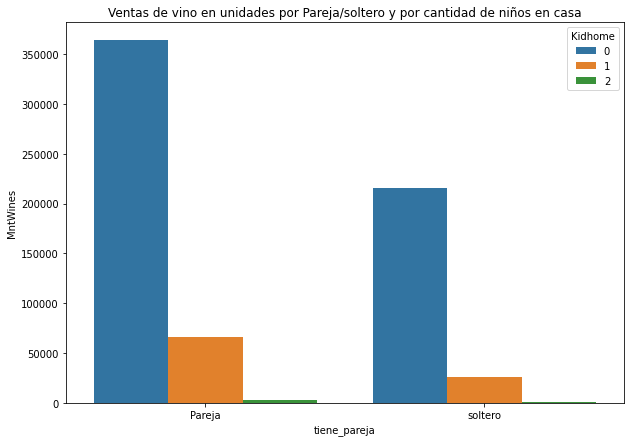

In [ ]:
# Agrupar y sumar los datos
grouped_data = df.groupby(['tiene_pareja', 'Kidhome']).sum()['MntWines'].reset_index()

# Ordenar los datos por la columna 'MntWines' de forma ascendente
# sorted_data = grouped_data.sort_values(by='tiene_pareja', ascending=True)

# Crear el gráfico de barras ordenado
fig = plt.figure(figsize=(10, 7))
sns.barplot(
    data=grouped_data,
    x='tiene_pareja',
    y='MntWines',
    hue='Kidhome',
    ci=None
)
plt.title('Ventas de vino en unidades por Pareja/soltero y por cantidad de niños en casa')
plt.show()


<h4>Identificamos que la cantidad de Hijos es una variable relevante para el consumo de uno de los productos mas vendidos en unidades, el vino (50%)</h4>
<h4>Con mayor detalle se identifica que:</h4>
<li>Los clientes sin Hijos son los que mas compras de vino generan (y en general mas compras de todos los tipos de productos), y de estos, los que estan casados o con pareja copran aun mas</li>
<li>Particularmente se identifica que los clientes con 0 o inclusi ve un joven en casa compran mas vino que los clientes con 2 jovenes en casa (esto para los clientes casados o con una pareja, no aplica para los clientess sin pareja), inclusive los clientes divorciados compran mas vino cuando tiene un joven en casa, que cuando no lo tienen</li>  
<li>Por ultimo, tambien se identifico que los clientes que compran mas vino son los que mayores ingresos tienen, lo cual se puede evidenciar en la correlacion entre las dos variables</li>  

<h4>
Identificando variables como los la cantidad de niños en casa y la cantidad de jovenes en casa como importantes inputs para el modelo</h4>

In [ ]:
wines_whit_one_kidhome=df[df['Kidhome'].isin([1,2,0])].groupby('generacion').sum()['MntWines'].sort_values(ascending=False)
wines_whit_one_kidhome

generacion
5_Generación X_1965 a 1980                  285463
4_Baby Boomers_1946 a 1964                  280388
6_Generación Y o Millennials_1981 a 1996     96576
3_Generación Silenciosa_1946 a 1964          12869
Name: MntWines, dtype: int64

### Analisis por tipo de educacion

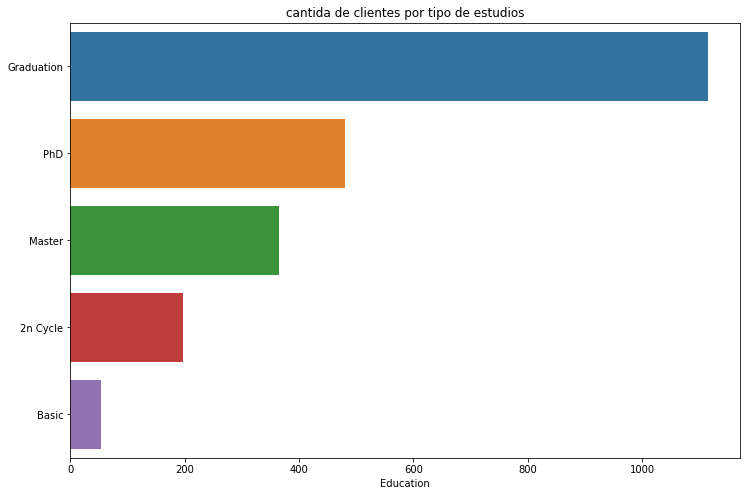

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.barplot(
    data=df,
    x=df['Education'].value_counts(),
    y=df['Education'].value_counts().index
    )
plt.title('cantida de clientes por tipo de estudios')
plt.show()

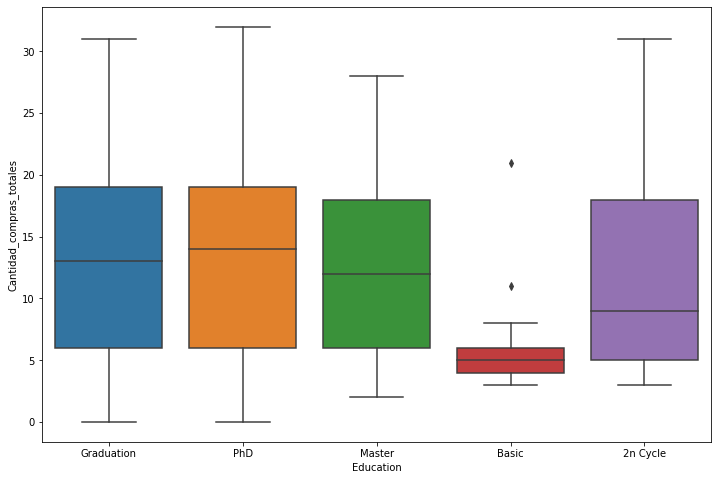

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(
    data=df,
    x='Education',
    y='Cantidad_compras_totales'
)
plt.show()

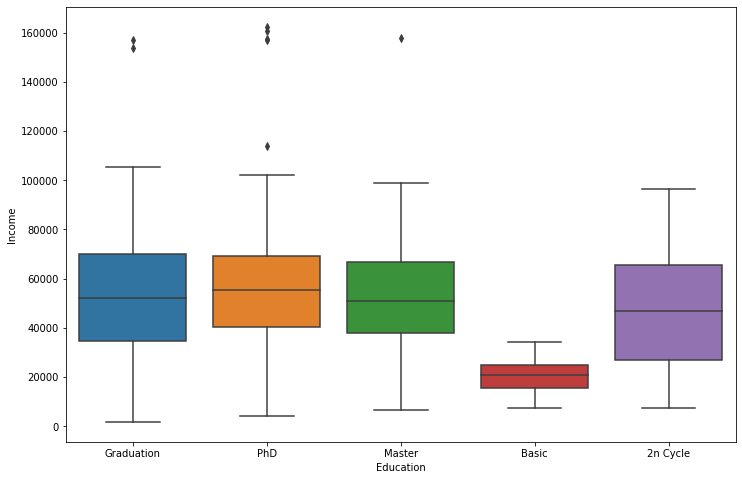

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(
    data=df,
    x='Education',
    y='Income'
)
plt.show()

In [ ]:
df_vino=df.groupby('Education').sum()['MntWines'].reset_index()
df_carne=df.groupby('Education').sum()['MntMeatProducts'].reset_index()
df_oro=df.groupby('Education').sum()['MntGoldProds'].reset_index()
df_pes=df.groupby('Education').sum()['MntFishProducts'].reset_index()
df_frutas=df.groupby('Education').sum()['MntFruits'].reset_index()


df_v_c= pd.merge(df_carne,df_vino,on='Education')
df_v_c_o= pd.merge(df_v_c,df_oro,on='Education')
df_con_pes=pd.merge(df_v_c_o,df_pes,on='Education')
df_con_frutas=pd.merge(df_con_pes,df_frutas,on='Education')

df_fin=df_con_frutas.reset_index().melt(id_vars='Education',value_vars=['MntWines','MntMeatProducts','MntGoldProds','MntFishProducts','MntFruits'],var_name='tipo_producto',value_name='cantidad')
df_fin.sort_values('cantidad',ascending=True)

Education    tipo_producto  cantidad
1        Basic         MntWines       391
21       Basic        MntFruits       600
6        Basic  MntMeatProducts       618
16       Basic  MntFishProducts       921
11       Basic     MntGoldProds      1233
20    2n Cycle        MntFruits      5866
23      Master        MntFruits      7802
10    2n Cycle     MntGoldProds      9349
24         PhD        MntFruits      9546
15    2n Cycle  MntFishProducts      9594
18      Master  MntFishProducts     11495
19         PhD  MntFishProducts     12824
13      Master     MntGoldProds     14669
14         PhD     MntGoldProds     15362
5     2n Cycle  MntMeatProducts     27003
22  Graduation        MntFruits     34427
0     2n Cycle         MntWines     40146
17  Graduation  MntFishProducts     48445
12  Graduation     MntGoldProds     56551
8       Master  MntMeatProducts     59466
9          PhD  MntMeatProducts     81082
3       Master         MntWines    121538
4          PhD         MntWines    195119
7   Graduation  MntMeatProducts    201301
2   Graduation         MntWines    318102

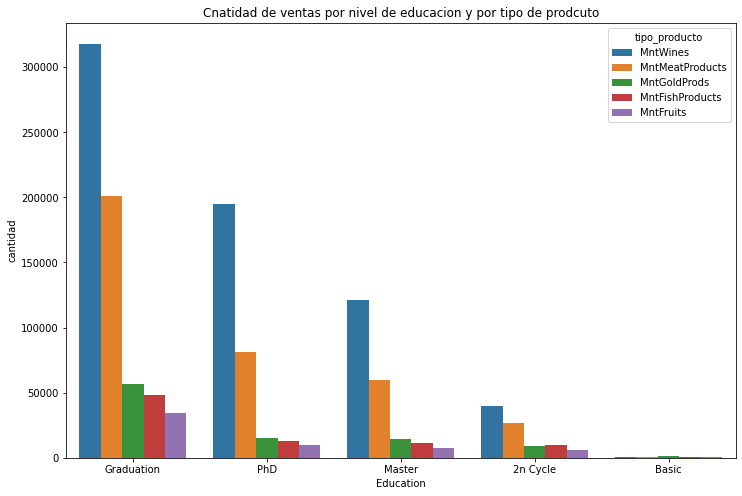

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.barplot(
    data=df_fin.sort_values('cantidad',ascending=False),
    x='Education',
    y='cantidad',
    ci=False,
    hue='tipo_producto'
)
plt.title('Cnatidad de ventas por nivel de educacion y por tipo de prodcuto')
plt.show()

<h4> De nuevo se vuelve a evidenciar como los ingresos estan muy relacinados con la cantida de compras y aunque los niveles de estudio no se llevaron al mapa de correlaciones, se evidencia como los ingresos estan muy relacionados con el nivel de estudios, y a su vez estos con la cantidad de compras.</h4>

<h4>Identificando variables como los ingresos y el nivel de estudios importantes inputs para el modelo</h4>

## Preparacion para el modelo

### Aplicar el one-hot econding para pasar a numerico las varibales categoricas

In [ ]:
# identificamos las variables que se identificaron como relevantes para el modelo en el previo EDA
var_model=['Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'generacion_num', 'capañas_aplicadas']

In [ ]:
df_model=df[var_model]
df_model.head()

Education Marital_Status   Income  Kidhome  Teenhome  MntWines  MntFruits  \
0  Graduation         Single  58138.0        0         0       635         88   
1  Graduation         Single  46344.0        1         1        11          1   
2  Graduation       Together  71613.0        0         0       426         49   
3  Graduation       Together  26646.0        1         0        11          4   
4         PhD        Married  58293.0        1         0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  generacion_num  capañas_aplicadas  
0                  7               4                  1  
1                  5               4                  0  
2                  4               5                  0  
3                  6               6                  0  
4                  5               6                  0

In [ ]:
var_categoricas=df_model.select_dtypes(object).columns

In [ ]:
df_model=pd.get_dummies(df_model,columns=var_categoricas)
df_model

Income  Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
0     58138.0        0         0       635         88              546   
1     46344.0        1         1        11          1                6   
2     71613.0        0         0       426         49              127   
3     26646.0        1         0        11          4               20   
4     58293.0        1         0       173         43              118   
...       ...      ...       ...       ...        ...              ...   
2235  61223.0        0         1       709         43              182   
2236  64014.0        2         1       406          0               30   
2237  56981.0        0         0       908         48              217   
2238  69245.0        0         1       428         30              214   
2239  52869.0        1         1        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0                 172                88            88                  3  ...   
1                   2                 1             6                  2  ...   
2                 111                21            42                  1  ...   
3                  10                 3             5                  2  ...   
4                  46                27            15                  5  ...   
...               ...               ...           ...                ...  ...   
2235               42               118           247                  2  ...   
2236                0                 0             8                  7  ...   
2237               32                12            24                  1  ...   
2238               80                30            61                  2  ...   
2239                2                 1            21                  3  ...   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0                      0   
4                    0              1                      0   
...                ...            ...                    ...   
2235                 0              0                      0   
2236                 0              1                      0   
2237                 0              0                      0   
2238                 1              0                      0   
2239                 0              1                      0   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   
...                    ...                      ...                     ...   
2235                     0                        0                       1   
2236                     0                        0                       0   
2237                     0                        1                       0   
2238                     0                        0                       0   
2239                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0          

### Escalar los datos

In [ ]:
scaaler=StandardScaler()
df_scaled= scaaler.fit_transform(df_model)
df_scaled

array([[ 0.28710487, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [-0.26088203,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.9131964 , -0.82275354, -0.92969866, ...,  1.69525969,
        -0.18862801, -0.03008284],
       ...,
       [ 0.23334696, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.80317156, -0.82275354,  0.90809708, ...,  1.69525969,
        -0.18862801, -0.03008284],
       [ 0.04229031,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284]])

In [ ]:
df_scaled=pd.DataFrame(df_scaled,columns=df_model.columns)
df_scaled.head()

Income   Kidhome  Teenhome  MntWines  MntFruits  MntMeatProducts  \
0  0.287105 -0.822754 -0.929699  0.977660   1.552041         1.690293   
1 -0.260882  1.040021  0.908097 -0.872618  -0.637461        -0.718230   
2  0.913196 -0.822754 -0.929699  0.357935   0.570540        -0.178542   
3 -1.176114  1.040021 -0.929699 -0.872618  -0.561961        -0.655787   
4  0.294307  1.040021 -0.929699 -0.392257   0.419540        -0.218684   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0         2.453472          1.483713      0.852576           0.351030  ...   
1        -0.651004         -0.634019     -0.733642          -0.168701  ...   
2         1.339513         -0.147184     -0.037254          -0.688432  ...   
3        -0.504911         -0.585335     -0.752987          -0.168701  ...   
4         0.152508         -0.001133     -0.559545           1.390492  ...   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0         -0.444542      -0.526437              -0.030083   
1         -0.444542      -0.526437              -0.030083   
2         -0.444542      -0.526437              -0.030083   
3         -0.444542      -0.526437              -0.030083   
4         -0.444542       1.899561              -0.030083   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0             -0.036852                -0.341479               -0.795281   
1             -0.036852                -0.341479               -0.795281   
2             -0.036852                -0.341479               -0.795281   
3             -0.036852                -0.341479               -0.795281   
4             -0.036852                -0.341479                1.257417   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0               1.925197                 -0.58988             -0.188628   
1               1.925197                 -0.58988             -0.188628   
2              -0.519427                  1.69526             -0.188628   
3              -0.519427                  1.69526             -0.188628   
4              -0.519427                 -0.58988             -0.188628   

   Marital_Status_YOLO  
0            -0.030083  
1            -0.030083  
2            -0.030083  
3            -0.030083  
4            -0.030083  

[5 rows x 29 columns]

### Reduccion de dimensionalidad con PCA

In [ ]:
pca=PCA()
pca.fit(df_scaled)
pca_data_scaled=pca.transform(df_scaled)
pca_data_scaled

array([[ 3.88086215e+00, -1.04508583e+00,  1.23482237e+00, ...,
        -1.30550226e-01,  1.30311829e-15,  2.65362779e-15],
       [-2.28915770e+00, -4.06761068e-01,  7.53569492e-01, ...,
         4.82307927e-02,  1.66394077e-15,  2.54260549e-15],
       [ 1.83616643e+00, -6.32677543e-01,  9.38296686e-01, ...,
         4.39435779e-01,  8.18729598e-17,  3.98589542e-15],
       ...,
       [ 1.41120269e+00, -8.66790473e-01,  4.29015236e-01, ...,
         6.74876563e-02, -1.49618330e-15, -6.33673195e-16],
       [ 1.95229600e+00,  1.51372675e+00, -7.43359193e-01, ...,
         4.72007825e-02,  6.60844478e-15,  2.41944012e-15],
       [-1.73191042e+00,  1.82197980e+00, -1.08095123e+00, ...,
         4.20598186e-01, -3.77214050e-15, -9.66740102e-16]])

In [ ]:
var = pca.explained_variance_ratio_
var

array([0.22244924, 0.07428574, 0.0580422 , 0.05205896, 0.04718714,
       0.04549134, 0.04227729, 0.04105782, 0.03877462, 0.03636689,
       0.03492077, 0.03479233, 0.03414712, 0.03365601, 0.02960904,
       0.02481076, 0.02194551, 0.02090829, 0.01839974, 0.01540802,
       0.01474762, 0.01339218, 0.01326281, 0.01084555, 0.00821943,
       0.00738613, 0.00555746, 0.        , 0.        ])

In [ ]:
cum_var = np.cumsum(np.round(var,decimals=3)*100)
cum_var

array([22.2, 29.6, 35.4, 40.6, 45.3, 49.8, 54. , 58.1, 62. , 65.6, 69.1,
       72.6, 76. , 79.4, 82.4, 84.9, 87.1, 89.2, 91. , 92.5, 94. , 95.3,
       96.6, 97.7, 98.5, 99.2, 99.8, 99.8, 99.8])

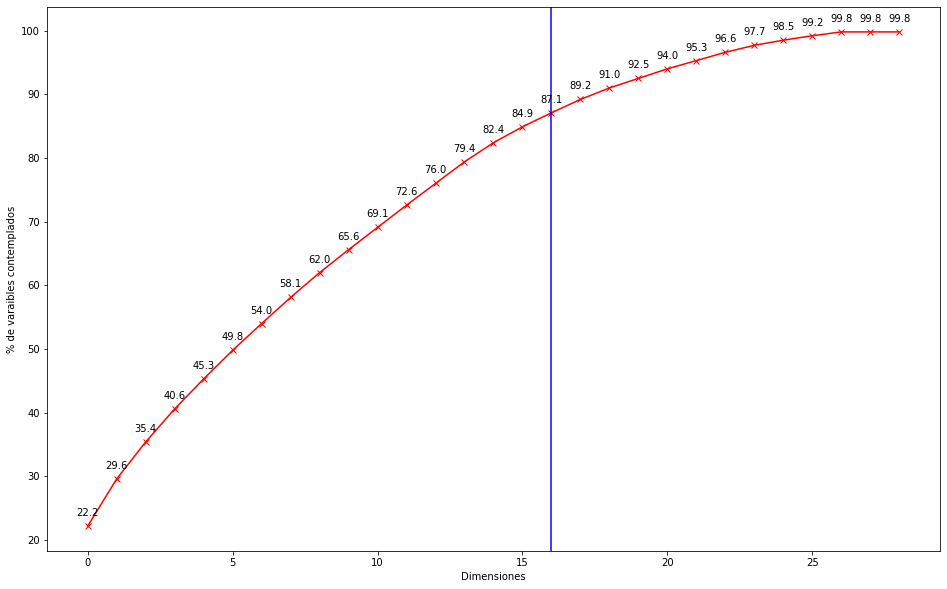

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(cum_var,'r-x')
for i, value in enumerate(cum_var):
    plt.annotate(f'{value:.1f}', (i, value), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('Dimensiones')
plt.ylabel('% de varaibles contemplados')
plt.axvline(x=16, color='b', linestyle='-', label='Línea en x=3')


plt.show()


<h4> Se identifica que una dimensionalidad adecuada para el modelo es de 16 componentes, la cual lograrar cubrir el 87% de las variables</h4>

In [ ]:
cant_dim=16

pca_data_standar=pd.DataFrame(pca_data_scaled)
pca_data_standar.drop(np.arange(cant_dim, cum_var.__len__()),axis=1,inplace=True)
pca_data_standar

0         1         2         3         4         5         6   \
0     3.880862 -1.045086  1.234822 -0.725990  1.910579  0.302583  0.417893   
1    -2.289158 -0.406761  0.753569 -1.014836  0.768019 -1.570051  1.113937   
2     1.836166 -0.632678  0.938297 -1.331404 -0.952766  0.129559 -0.990045   
3    -2.559575 -1.671557  0.749949 -1.205432 -0.497166  0.296510 -1.272681   
4    -0.394658  0.173356 -1.003274  1.945793  0.680618  0.563442 -1.342422   
...        ...       ...       ...       ...       ...       ...       ...   
2207  2.574293  0.402490  2.393573  1.479478  0.028964  0.662346 -0.048832   
2208 -1.382282  3.344714 -0.309942 -1.134848  0.750221  0.934043 -2.014959   
2209  1.411203 -0.866790  0.429015 -0.347389  0.999369 -0.596321  0.094124   
2210  1.952296  1.513727 -0.743359 -1.654744 -2.044047  0.939949  1.295894   
2211 -1.731910  1.821980 -1.080951  1.469993  0.171675 -0.892881 -0.770783   

            7         8         9         10        11        12        13  \
0     0.267736 -0.766158  0.128986 -0.097029 -0.122053 -0.084064 -0.127787   
1     0.152518 -1.011360 -0.932418  0.107470  0.531766 -0.279800 -0.103821   
2    -0.712012 -0.148773 -0.212534  0.206620 -0.153765  0.299401 -0.136062   
3    -1.085456  0.449517 -0.087924 -0.086903  0.164678 -0.085648  0.339753   
4    -0.129222 -0.041036 -0.309539  0.127499  0.403691 -0.017959 -0.421582   
...        ...       ...       ...       ...       ...       ...       ...   
2207  0.149392 -0.450230  0.539405  0.253641 -0.261060  0.196879 -0.289863   
2208 -0.946977  0.160543 -0.086367 -0.305858  0.348390 -0.702955 -0.364241   
2209  0.685099  3.017291  0.042500  0.189613 -0.809627  0.344507  0.071181   
2210 -1.081307 -0.474936 -0.370822  0.325012 -0.294381  0.370719 -0.098701   
2211 -0.109738 -0.013387  0.022776 -0.006515  0.344232 -0.432694 -0.304336   

            14        15  
0    -0.107810  0.962083  
1     0.635960  1.142312  
2    -0.058995 -1.566192  
3    -0.705194 -0.526654  
4    -2.407303  0.002898  
...        ...       ...  
2207  0.613592 -1.724272  
2208 -1.359727  1.583437  
2209 -0.187314 -1.114494  
2210  0.087737 -0.290644  
2211 -0.087847  0.760800  

[2212 rows x 16 columns]

## Propuesta de modelos a aplicar

<h5> Debido a el comportmaiendo de los datos y del tipo de conglomerado de los mismos se plantea la aplicacion de dos modelos:</h5>
<li>K-Menas</li>
<li>Análisis de conglomerados jerárquicos - Ward</li> 
<h5> Lo anterior basado en la siguiente documentacion de scikit learn</h5>

<img src="/Machine-Learning/Imagenes/plot_cluster_comparison_001.png" alt="Matriz de los mejores modelos para los tipos datos" width="1100"/>

Fuente:
https://qu4nt.github.io/sklearn-doc-es/modules/clustering.html#hierarchical-clustering

## Aplicando K-means 

### Identificamos el K mas adecuado

In [ ]:
# Definir el rango de valores para n_init (numero de inicializaciones que el algoritmo realiza para ubicar los centroides)
n_init_values = [10, 20, 30,"auto"]
# Definir la cantidad de cluster a evaluar
k = range(2, 8)

In [ ]:
# Crear listas para almacenar los resultados
sum_de_distancia_cuadrada = {n: [] for n in n_init_values}
indice_silueta = {n: [] for n in n_init_values}

# Evaluar con PCA
for n_init_i in n_init_values:
    for i in k:
        km = KMeans(n_init=n_init_i, n_clusters=i, random_state=0)
        y = km.fit_predict(pca_data_standar)
        sum_de_distancia_cuadrada[n_init_i].append(km.inertia_)
        indice_silueta[n_init_i].append(silhouette_score(pca_data_standar, y))

In [ ]:
# Evaluar sin PCA
sum_de_distancia_cuadrada_sinPCA = {n: [] for n in n_init_values}
indice_silueta_sinPCA = {n: [] for n in n_init_values}

for n_init_i in n_init_values:
    for i in k:
        km = KMeans(n_init=n_init_i, n_clusters=i, random_state=0)
        y_sinPCA = km.fit_predict(df_scaled)
        sum_de_distancia_cuadrada_sinPCA[n_init_i].append(km.inertia_)
        indice_silueta_sinPCA[n_init_i].append(silhouette_score(df_scaled, y_sinPCA))

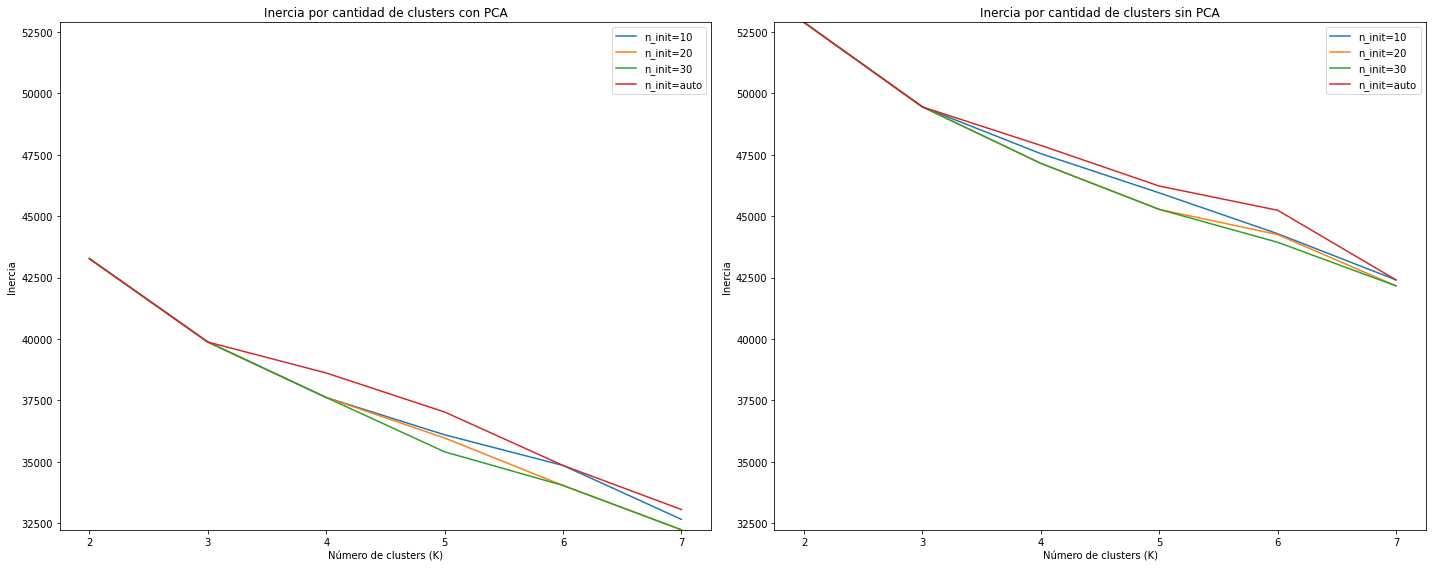

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Inercia con PCA
for n_init in n_init_values:
    axes[0].plot(
        k, 
        sum_de_distancia_cuadrada[n_init], 
        label=f'n_init={n_init}'
    )
axes[0].set_xlabel('Número de clusters (K)')
axes[0].set_ylabel('Inercia')
axes[0].set_title('Inercia por cantidad de clusters con PCA')
axes[0].legend()

# Inercia sin PCA
for n_init in n_init_values:
    axes[1].plot(
        k, 
        sum_de_distancia_cuadrada_sinPCA[n_init], 
        label=f'n_init={n_init}'
    )
axes[1].set_xlabel('Número de clusters (K)')
axes[1].set_ylabel('Inercia')
axes[1].set_title('Inercia por cantidad de clusters sin PCA')
axes[1].legend()

min_y = min(
    min(sum_de_distancia_cuadrada[n_init]) for n_init in n_init_values
)
min_y = min(min_y, min(
    min(sum_de_distancia_cuadrada_sinPCA[n_init]) for n_init in n_init_values
))
max_y = max(
    max(sum_de_distancia_cuadrada[n_init]) for n_init in n_init_values
)
max_y = max(max_y, max(
    max(sum_de_distancia_cuadrada_sinPCA[n_init]) for n_init in n_init_values
))

# Ajusta los límites del eje y en ambos graficos
axes[0].set_ylim(min_y, max_y)
axes[1].set_ylim(min_y, max_y)

plt.tight_layout()
plt.show()


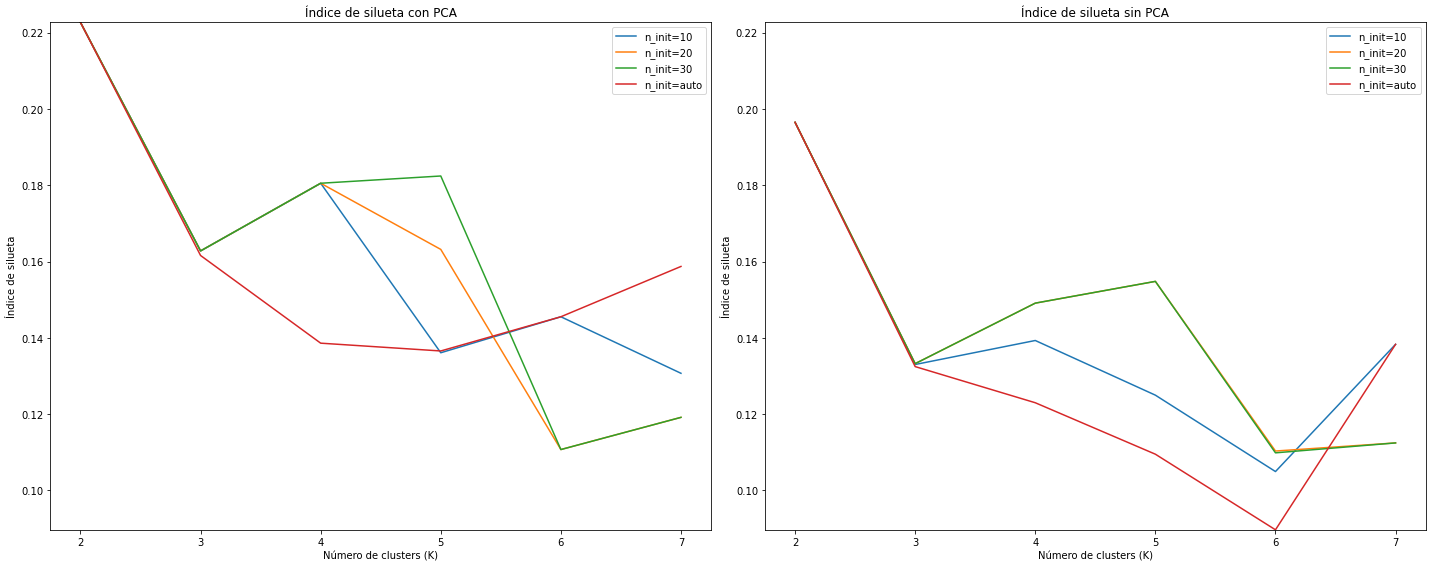

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Índice de silueta con PCA
for n_init in n_init_values:
    axes[0].plot(
        k,
        indice_silueta[n_init], 
        label=f'n_init={n_init}'
    )
    
axes[0].set_xlabel('Número de clusters (K)')
axes[0].set_ylabel('Índice de silueta')
axes[0].set_title('Índice de silueta con PCA')
axes[0].legend()

# Índice de silueta sin PCA
for n_init in n_init_values:
    axes[1].plot(
        k, 
        indice_silueta_sinPCA[n_init], 
        label=f'n_init={n_init}'
    )

axes[1].set_xlabel('Número de clusters (K)')
axes[1].set_ylabel('Índice de silueta')
axes[1].set_title('Índice de silueta sin PCA')
axes[1].legend()

min_y = min(
    min(indice_silueta[n_init]) for n_init in n_init_values
)
min_y = min(min_y, min(
    min(indice_silueta_sinPCA[n_init]) for n_init in n_init_values
))
max_y = max(
    max(indice_silueta[n_init]) for n_init in n_init_values
)
max_y = max(max_y, max(
    max(indice_silueta_sinPCA[n_init]) for n_init in n_init_values
))

# Ajusta los límites del eje y en ambas subparcelas
axes[0].set_ylim(min_y, max_y)
axes[1].set_ylim(min_y, max_y)

plt.tight_layout()
plt.show()

<h4>Se identifica a partir del indice de silueta y la inercia con el grafico de rodilla, que la cantidad de clusters mas adecuada es 4 y un n_init=10</h4>

### Aplicando K-means con el K mas optimo

In [ ]:
km = KMeans(n_init=10,n_clusters=4, random_state=0) # se usa el parametro random_state para tener reproductibilidad del modelo
y = km.fit_predict(pca_data_standar)

In [ ]:
km = KMeans(n_init=10,n_clusters=4, random_state=0) # se usa el parametro random_state para tener reproductibilidad del modelo
y_sinPCA = km.fit_predict(df_scaled)

### Evaluando el modelo K-means

In [ ]:
print(silhouette_score(pca_data_standar,y))
# silhouette_score con pca

0.18052288138891073


In [ ]:
print(silhouette_score(df_scaled,y_sinPCA))
# silhouette_score sin pca

0.13928845123090905


In [ ]:
df['k-means_pca']=y

In [ ]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
0  04-09-2012       58       635         88  ...             0         0   
1  08-03-2014       38        11          1  ...             0         0   
2  21-08-2013       26       426         49  ...             0         0   
3  10-02-2014       26        11          4  ...             0         0   
4  19-01-2014       94       173         43  ...             0         0   

   Response                                generacion  generacion_num  \
0         1                4_Baby Boomers_1946 a 1964               4   
1         0                4_Baby Boomers_1946 a 1964               4   
2         0                5_Generación X_1965 a 1980               5   
3         0  6_Generación Y o Millennials_1981 a 1996               6   
4         0  6_Generación Y o Millennials_1981 a 1996               6   

   tiene_hijos  Cantidad_compras_totales  capañas_aplicadas  tiene_pareja  \
0            0                        22                  1       soltero   
1            1                         4                  0       soltero   
2            0                        20                  0        Pareja   
3            1                         6                  0        Pareja   
4            1                        14                  0        Pareja   

   k-means_pca  
0            2  
1            1  
2            2  
3            1  
4            1  

[5 rows x 33 columns]

### Evaluamos los resultados del del K-means con PCA

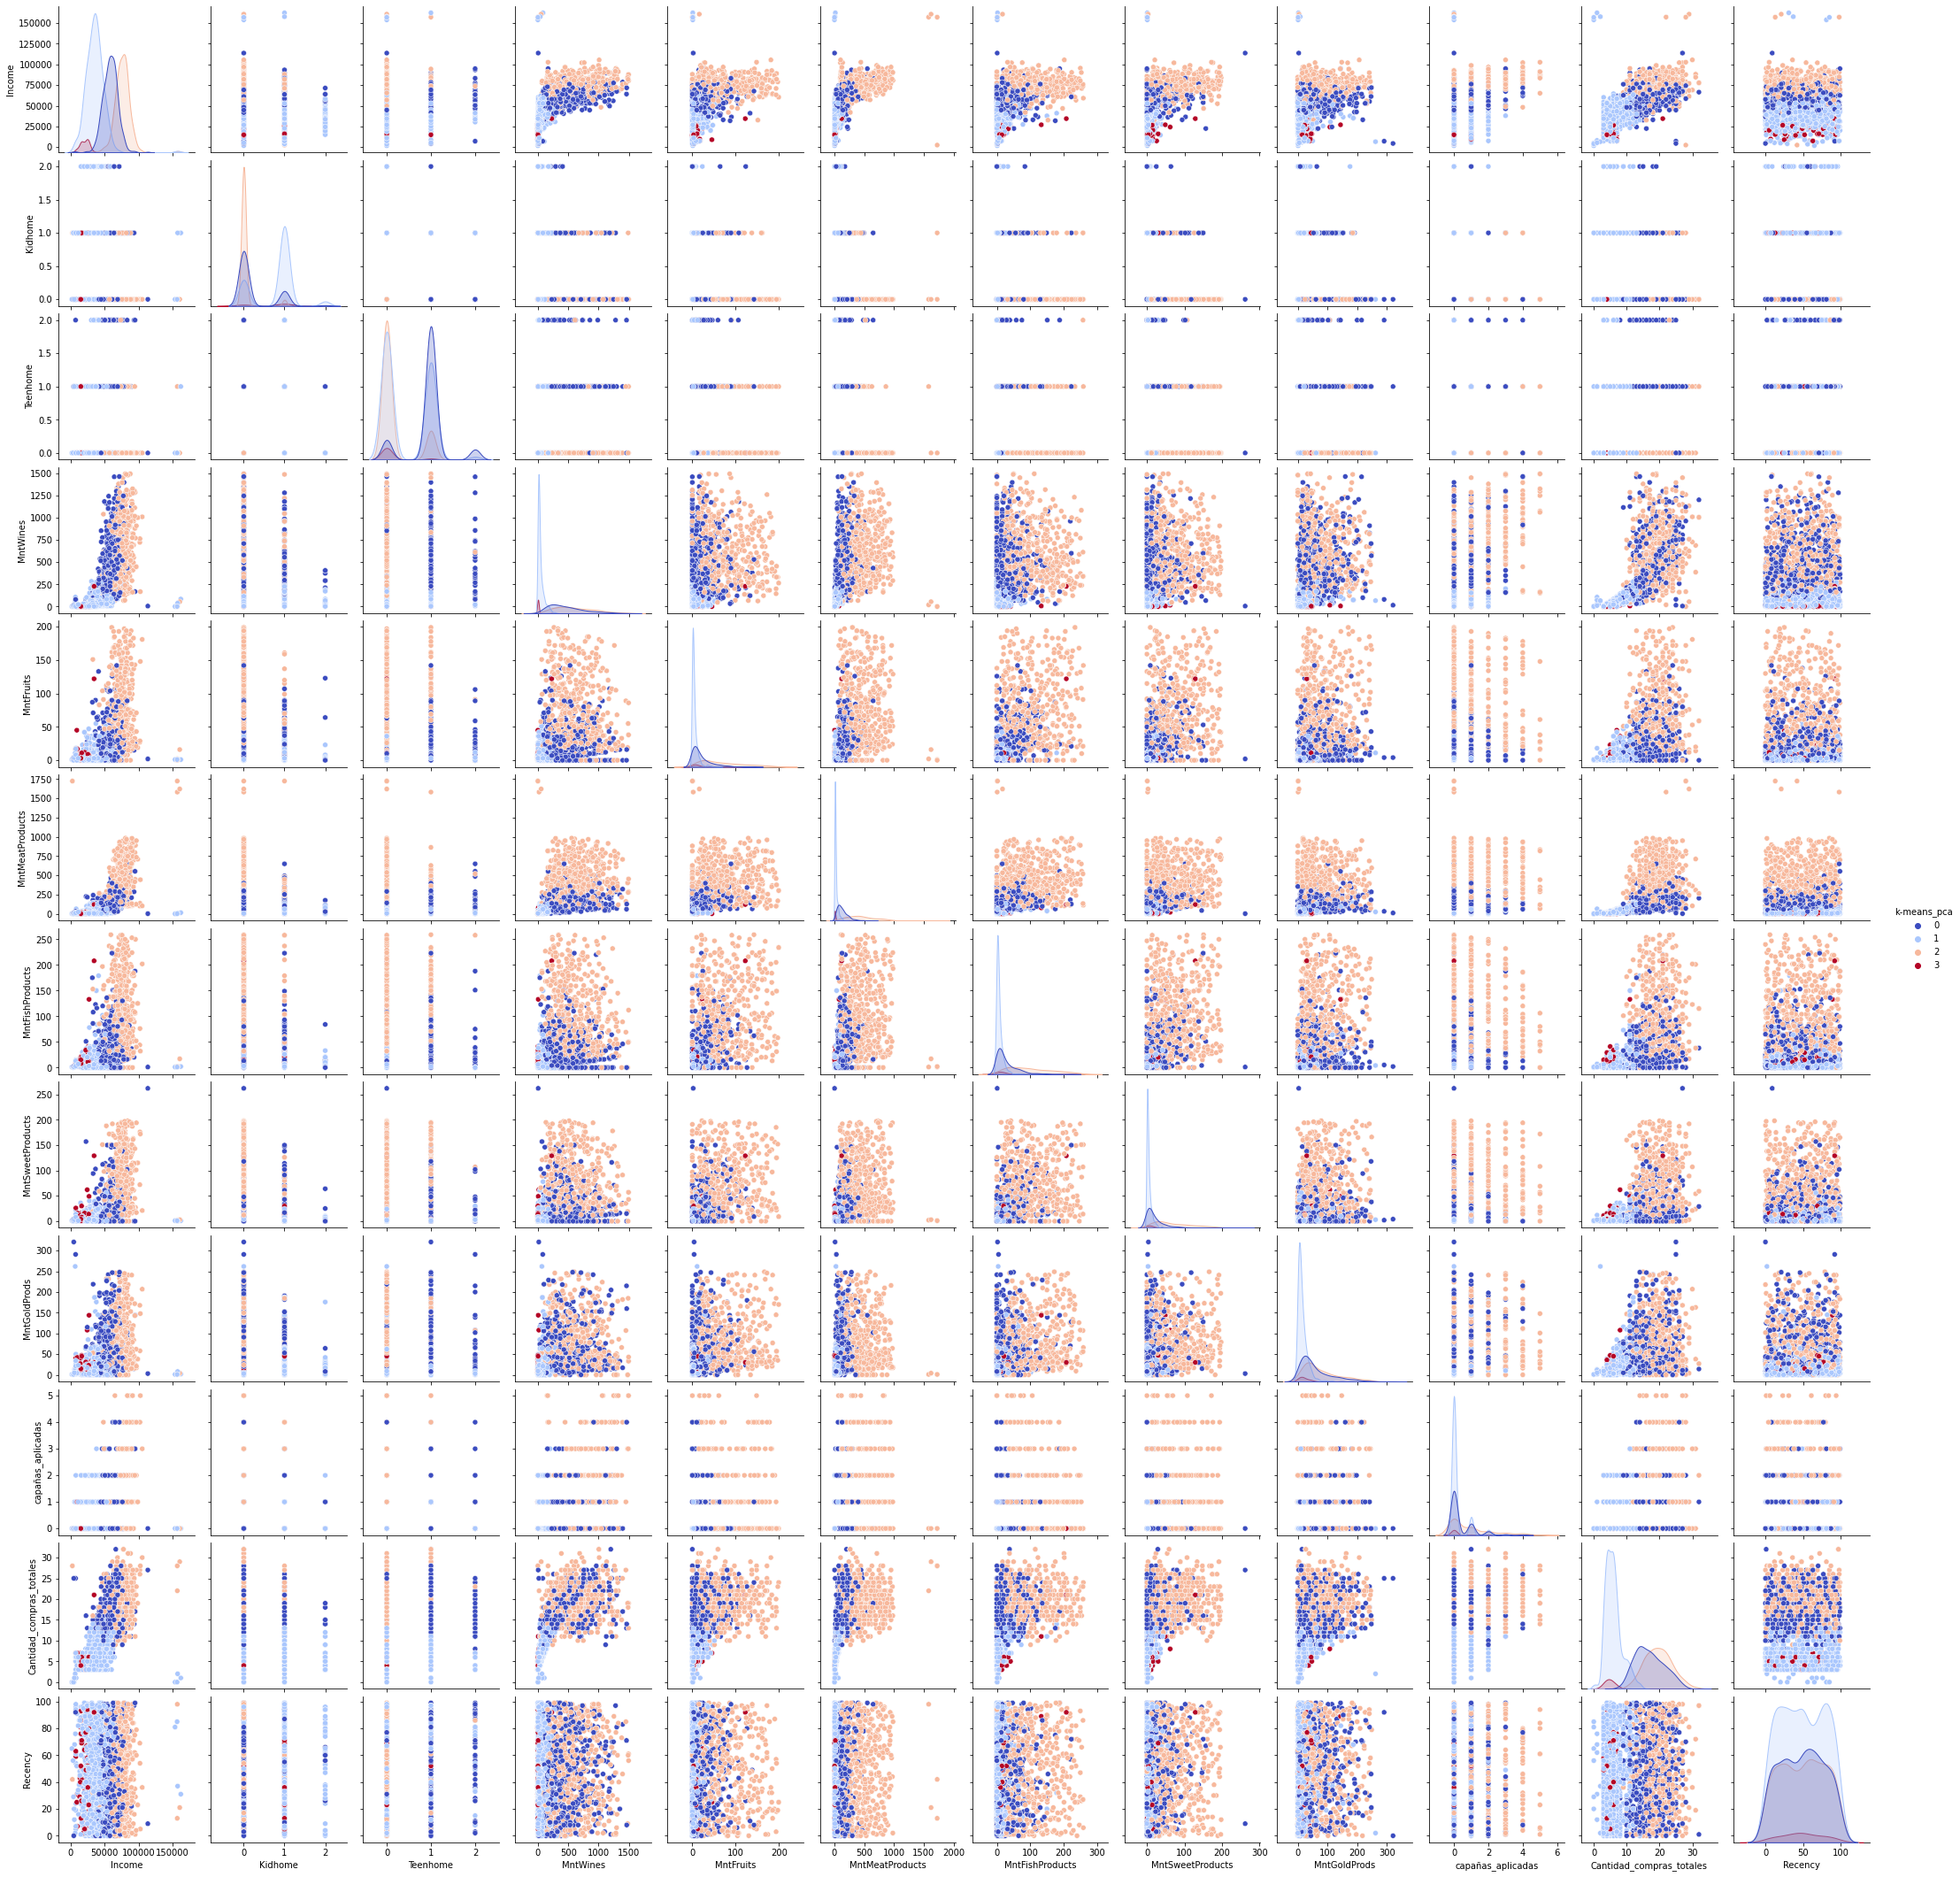

In [ ]:
df_vis=df[['Income', 'Kidhome','Teenhome','k-means_pca','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','capañas_aplicadas','Cantidad_compras_totales','Recency']] 

sns.pairplot(
    df_vis,
    hue='k-means_pca',
    palette='coolwarm'
    )
plt.show()


<h4> Se logran crear grupos de clusters que aunque no estan totalmente segmentados en todas sus variables, se identifican variables por las que claramente se diferencia, como los son los ingresos, la cantidad niños en casa, la cantidad de compras de carne, vino y fruta.  Se continuara con el analisis de los clusters creados, para reconocer mas segmentaciones que lograra hacer en variables categoricas o con un menor nivel de detalle<h4> 

In [ ]:
df.groupby('k-means_pca').describe()['Kidhome'].sort_values('mean')

count      mean       std  min  25%  50%  75%  max
k-means_pca                                                    
2            581.0  0.043029  0.203098  0.0  0.0  0.0  0.0  1.0
0            613.0  0.231648  0.444843  0.0  0.0  0.0  0.0  2.0
3             54.0  0.629630  0.487438  0.0  0.0  1.0  1.0  1.0
1            964.0  0.804979  0.490127  0.0  1.0  1.0  1.0  2.0

In [ ]:
df.groupby(['k-means_pca']).mean()[['Year_Birth','Income']].sort_values('Year_Birth')

Year_Birth        Income
k-means_pca                           
0            1964.230016  58045.564437
2            1968.561102  75928.375215
1            1971.625519  35414.973029
3            1977.462963  20306.259259

In [ ]:
df[['k-means_pca','Education']].sort_values('k-means_pca')

k-means_pca   Education
564             0         PhD
648             0      Master
649             0  Graduation
1575            0         PhD
1574            0  Graduation
...           ...         ...
1746            3       Basic
1896            3       Basic
2200            3       Basic
2183            3       Basic
2104            3       Basic

[2212 rows x 2 columns]

In [ ]:
df.groupby('k-means_pca').describe()['Income'].reset_index().sort_values('mean')

k-means_pca  count          mean           std     min       25%      50%  \
3            3   54.0  20306.259259   6235.066773  7500.0  15405.25  20744.0   
1            1  964.0  35414.973029  14137.100528  1730.0  27017.00  34951.0   
0            0  613.0  58045.564437  10961.929348  4428.0  50729.00  58308.0   
2            2  581.0  75928.375215  11897.593324  2447.0  69867.00  76005.0   

       75%       max  
3  24882.0   34445.0  
1  42586.0  162397.0  
0  65176.0  113734.0  
2  82032.0  160803.0

In [ ]:
orden=df.groupby('k-means_pca').describe()['Income'].reset_index().sort_values('mean')['k-means_pca']
orden

3    3
1    1
0    0
2    2
Name: k-means_pca, dtype: int64

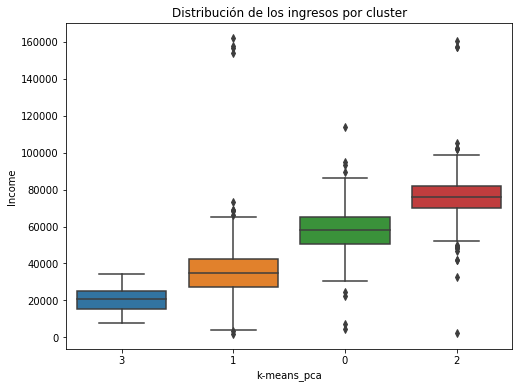

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    y='Income',
    x='k-means_pca',
    order=orden
)
plt.title('Distribución de los ingresos por cluster')
plt.show()

<h4>Se confirma como el modelo segmento claramente por los ingresos de los clientes</h4>

In [ ]:
ninos_casa=df.copy()
ninos_casa['tiene_ninos']=ninos_casa['Kidhome'].apply(lambda x: 1 if x >= 1 else 0) 
ninos_casa=ninos_casa.groupby('k-means_pca').sum()['tiene_ninos'].reset_index()
ninos_casa['proba']=(ninos_casa['tiene_ninos']/df['k-means_pca'].value_counts())*100
ninos_casa


k-means_pca  tiene_ninos      proba
0            0          136  22.185971
1            1          736  76.348548
2            2           25   4.302926
3            3           34  62.962963

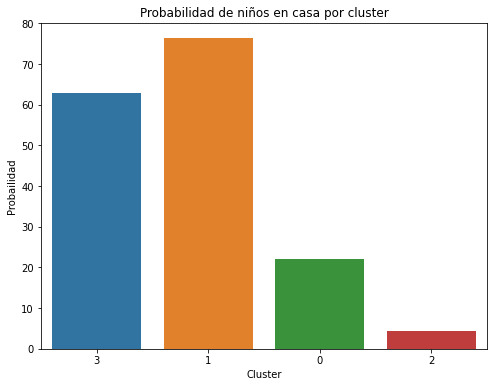

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.barplot(
    data=ninos_casa,
    y='proba',
    x='k-means_pca',
    order=orden,
    ci=False
)

plt.title('Probabilidad de niños en casa por cluster')
plt.ylabel('Probailidad')
plt.xlabel('Cluster')

plt.show()

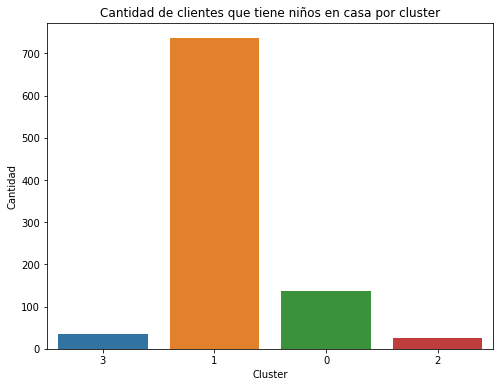

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.barplot(
    data=ninos_casa,
    y='tiene_ninos',
    x='k-means_pca',
    ci=False,
    order=orden
)

plt.title('Cantidad de clientes que tiene niños en casa por cluster')
plt.ylabel('Cantidad')
plt.xlabel('Cluster')
plt.show()

In [ ]:
df['k-means_pca'].value_counts()

1    964
0    613
2    581
3     54
Name: k-means_pca, dtype: int64

In [ ]:
df_pro=df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_total_productos=df_pro.loc[:, df_pro.columns != 'k-means_pca'].sum(axis=1)
df_total_productos=pd.DataFrame(df_total_productos.reset_index())
df_total_productos.rename(columns={0:'cantidad_total','index':'k-means_pca'},inplace=True)
df_total_productos


k-means_pca  cantidad_total
0            0           88090
1            1           67647
2            2           30253
3            3            1960

In [ ]:
# Agrupamos y sumamos todas las columnas de interés en una sola operación
df_sum = df.groupby('k-means_pca').sum().reset_index()

# Seleccionamos solo las columnas de interés y fusionamos el DataFrame
columnas_interes = ['k-means_pca', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits', 'MntSweetProducts']
df_interes = df_sum[columnas_interes]

# Realizamos el melt (pivotar la tabla) para mayor facilidad de la visualización
df_ventas_productos = df_interes.melt(id_vars='k-means_pca', 
                         value_vars=['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits', 'MntSweetProducts'], 
                         var_name='tipo_producto', 
                         value_name='cantidad')

# Se calcula la probabilidad
df_ventas_productos = pd.merge(df_ventas_productos, df_total_productos, on='k-means_pca')
df_ventas_productos['proba'] = (df_ventas_productos['cantidad'] / df_ventas_productos['cantidad_total']) * 100


df_ventas_productos

k-means_pca     tipo_producto  cantidad  cantidad_total      proba
0             0          MntWines     52818           88090  59.959133
1             0   MntMeatProducts     18357           88090  20.838915
2             0      MntGoldProds      7561           88090   8.583267
3             0   MntFishProducts      3643           88090   4.135543
4             0         MntFruits      2746           88090   3.117266
5             0  MntSweetProducts      2965           88090   3.365876
6             1          MntWines     28589           67647  42.262037
7             1   MntMeatProducts     17556           67647  25.952370
8             1      MntGoldProds     10450           67647  15.447840
9             1   MntFishProducts      4643           67647   6.863571
10            1         MntFruits      3181           67647   4.702352
11            1  MntSweetProducts      3228           67647   4.771830
12            2          MntWines     14341           30253  47.403563
13            2   MntMeatProducts      8756           30253  28.942584
14            2      MntGoldProds      1690           30253   5.586223
15            2   MntFishProducts      2541           30253   8.399167
16            2         MntFruits      1610           30253   5.321786
17            2  MntSweetProducts      1315           30253   4.346676
18            3          MntWines        90            1960   4.591837
19            3   MntMeatProducts       249            1960  12.704082
20            3      MntGoldProds       651            1960  33.214286
21            3   MntFishProducts       368            1960  18.775510
22            3         MntFruits       297            1960  15.153061
23            3  MntSweetProducts       305            1960  15.561224

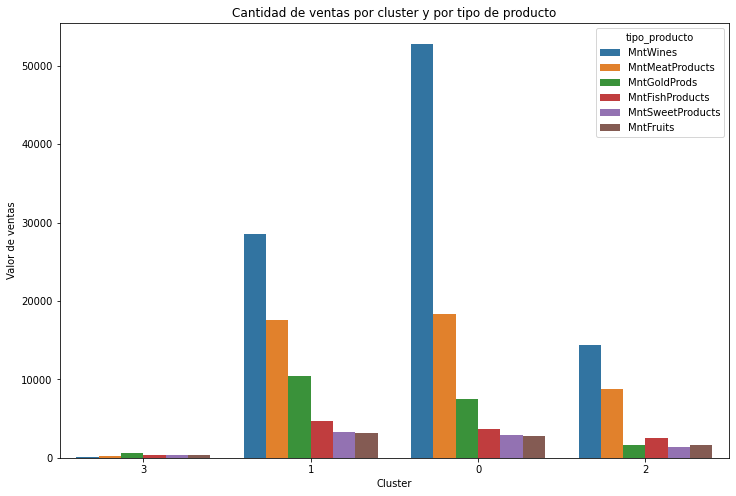

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.barplot(
    data=df_ventas_productos.sort_values('cantidad',ascending=False),
    x='k-means_pca',
    y='cantidad',
    ci=False,
    hue='tipo_producto',
    order=orden
)
plt.title('Cantidad de ventas por cluster y por tipo de producto')

plt.ylabel('Valor de ventas')
plt.xlabel('Cluster')

plt.show()

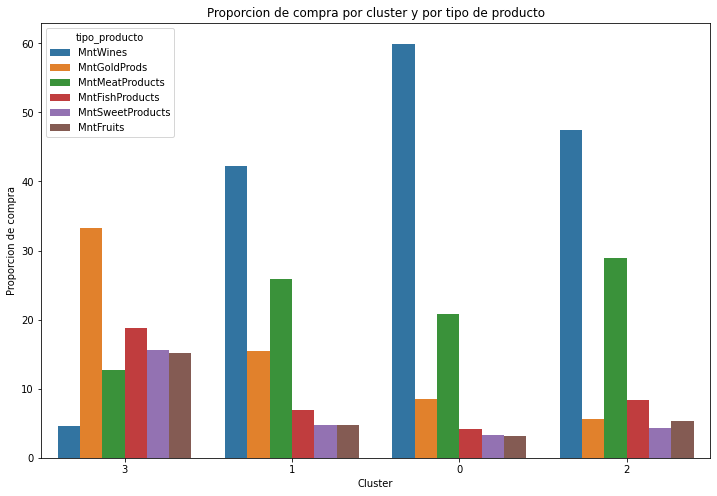

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.barplot(
    data=df_ventas_productos.sort_values('proba',ascending=False),
    x='k-means_pca',
    y='proba',
    ci=False,
    hue='tipo_producto',
    order=orden
)

plt.ylabel('Proporcion de compra')
plt.xlabel('Cluster')

plt.title('Proporcion de compra por cluster y por tipo de producto')
plt.show()

In [ ]:
df_total_clusters=df['k-means_pca'].value_counts().reset_index()
df_total_clusters.rename(columns={'index':'k-means_pca','k-means_pca':'cantidad_total'},inplace=True)
df_total_clusters


k-means_pca  cantidad_total
0            1             964
1            0             613
2            2             581
3            3              54

In [ ]:
df_estado_civil=df.groupby(['k-means_pca','Marital_Status']).count()['Year_Birth'].reset_index().rename(columns={'Year_Birth':'cantidad'})
df_totl_mariatl=df.groupby(['k-means_pca']).count()['Marital_Status'].reset_index().rename(columns={'Marital_Status':'total'})

df_estado_civil=df_estado_civil.merge(df_totl_mariatl, on='k-means_pca')

df_estado_civil['proba']=(df_estado_civil['cantidad']/df_estado_civil['total'])*100

df_estado_civil

k-means_pca Marital_Status  cantidad  total      proba
0             0          Alone         1    613   0.163132
1             0       Divorced        83    613  13.539967
2             0        Married       249    613  40.619902
3             0         Single        93    613  15.171289
4             0       Together       158    613  25.774878
5             0          Widow        27    613   4.404568
6             0           YOLO         2    613   0.326264
7             1          Alone         2    964   0.207469
8             1       Divorced        95    964   9.854772
9             1        Married       377    964  39.107884
10            1         Single       216    964  22.406639
11            1       Together       250    964  25.933610
12            1          Widow        24    964   2.489627
13            2         Absurd         2    581   0.344234
14            2       Divorced        52    581   8.950086
15            2        Married       211    581  36.316695
16            2         Single       143    581  24.612737
17            2       Together       149    581  25.645439
18            2          Widow        24    581   4.130809
19            3       Divorced         1     54   1.851852
20            3        Married        20     54  37.037037
21            3         Single        18     54  33.333333
22            3       Together        14     54  25.925926
23            3          Widow         1     54   1.851852

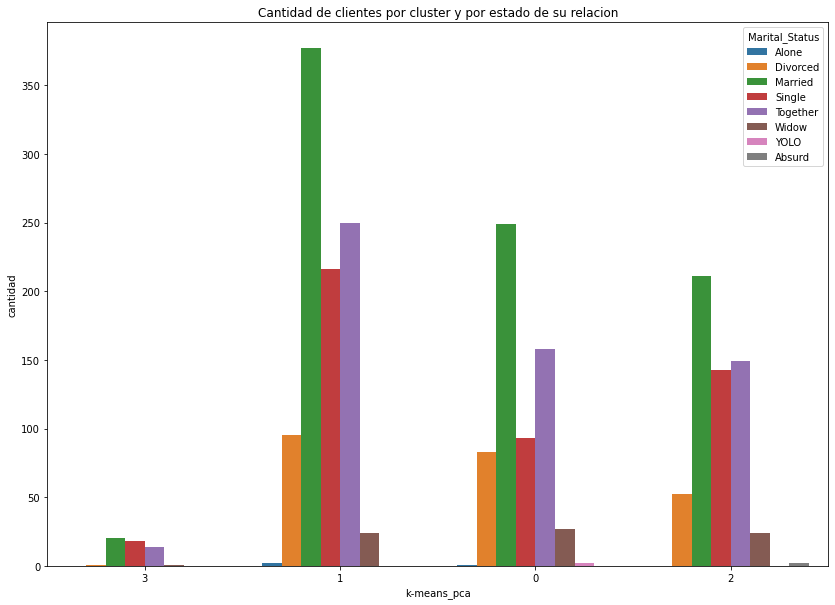

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_estado_civil,
    x='k-means_pca',
    y='cantidad',
    hue='Marital_Status',
    order=orden
)
plt.title('Cantidad de clientes por cluster y por estado de su relacion')
plt.show()

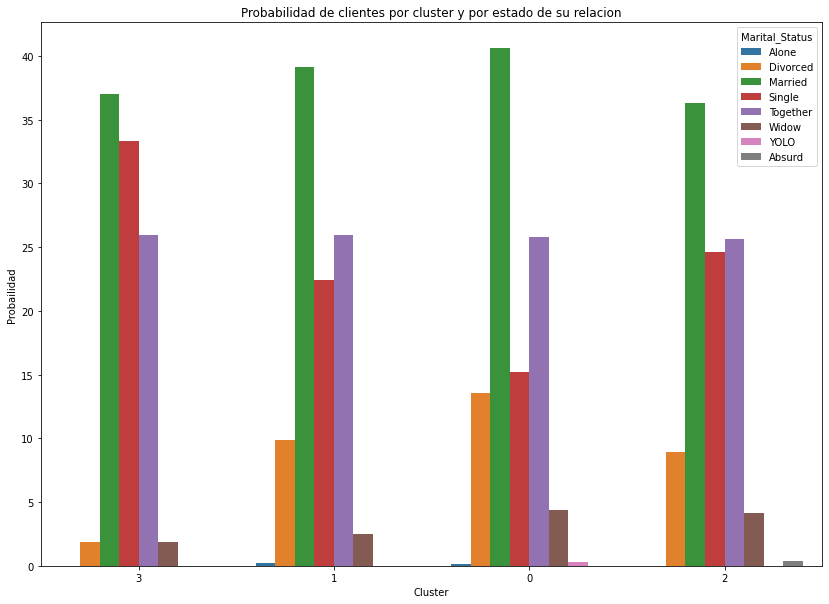

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_estado_civil,
    x='k-means_pca',
    y='proba',
    hue='Marital_Status',
    order=orden
)

plt.ylabel('Probailidad')
plt.xlabel('Cluster')

plt.title('Probabilidad de clientes por cluster y por estado de su relacion')
plt.show()

<h5> Se Identifica la distribución de los de relación en los diferentes clusters, y aunque no se observen claras y definidas direfncias entre los clusters, si se puede llegar a tomar decisiones en base a estos datos, como identificar los clusters mas adecuados para promocionar o comuicar productos enfocados para un publico de clientes sin pareja</h5>

In [ ]:
df_nivel_educacion=df.groupby(['k-means_pca','Education']).count()['Year_Birth'].reset_index().rename(columns={'Year_Birth':'cantidad'})
df_totl_meducacion=df.groupby(['k-means_pca']).count()['Education'].reset_index().rename(columns={'Education':'total'})

df_nivel_educacion=df_nivel_educacion.merge(df_totl_meducacion, on='k-means_pca')

df_nivel_educacion['proba']=(df_nivel_educacion['cantidad']/df_nivel_educacion['total'])*100

df_nivel_educacion

k-means_pca   Education  cantidad  total       proba
0             0    2n Cycle        34    613    5.546493
1             0  Graduation       268    613   43.719413
2             0      Master       128    613   20.880914
3             0         PhD       183    613   29.853181
4             1    2n Cycle       109    964   11.307054
5             1  Graduation       511    964   53.008299
6             1      Master       159    964   16.493776
7             1         PhD       185    964   19.190871
8             2    2n Cycle        55    581    9.466437
9             2  Graduation       336    581   57.831325
10            2      Master        78    581   13.425129
11            2         PhD       112    581   19.277108
12            3       Basic        54     54  100.000000

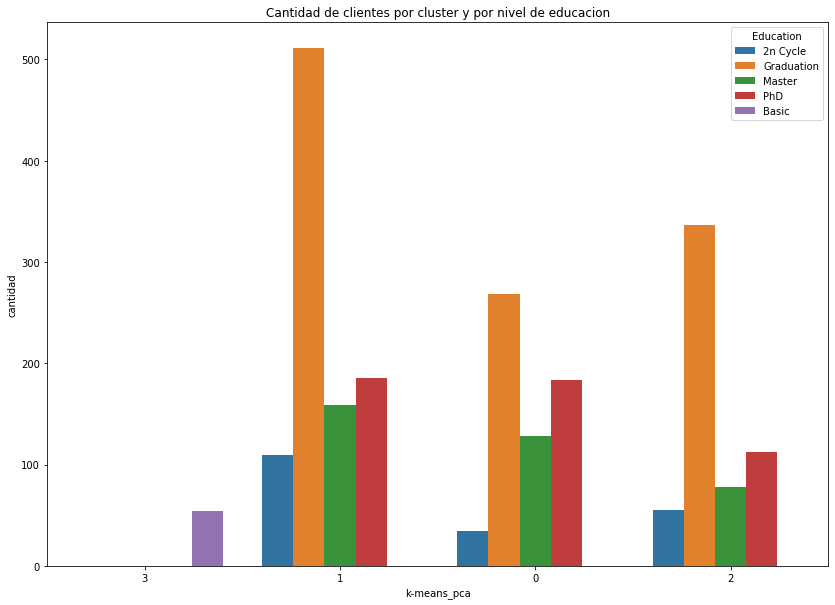

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_nivel_educacion,
    x='k-means_pca',
    y='cantidad',
    hue='Education',
    order=orden
)
plt.title('Cantidad de clientes por cluster y por nivel de educacion')
plt.show()

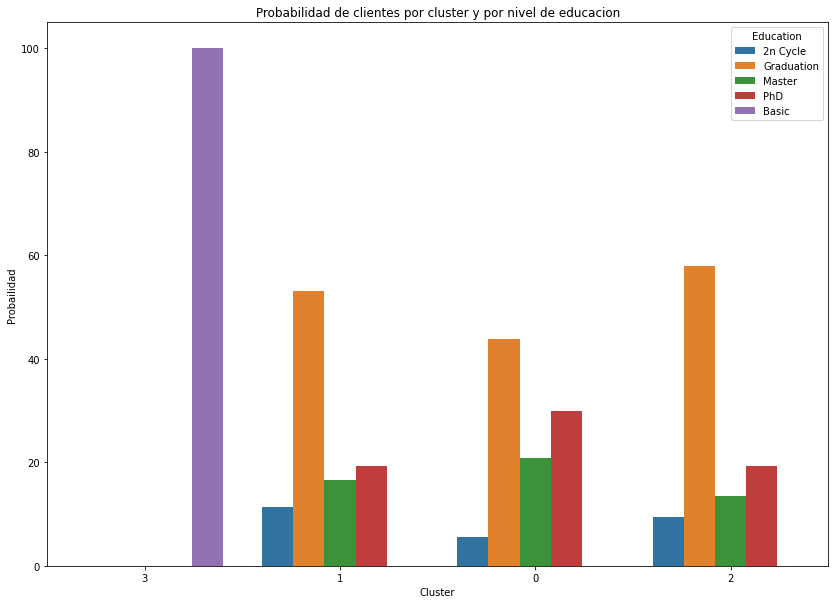

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_nivel_educacion,
    x='k-means_pca',
    y='proba',
    hue='Education',
    order=orden
)

plt.ylabel('Probailidad')
plt.xlabel('Cluster')

plt.title('Probabilidad de clientes por cluster y por nivel de educacion')
plt.show()

<h5>Con esta visual identificamos uno de los principales criterios por los cuales el modelo asigno los clientes que componene el cluster o segmento 3, y es una variabl clara para asignar clientes al cluster mas adelante, inclusive para asignar el comportmaiento de compra de los clientes con un nivel de educion basico<h5>

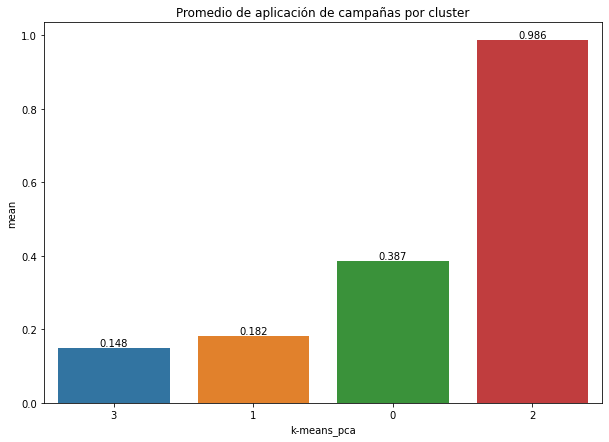

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10,7))
ax = sns.barplot(
    data=df.groupby('k-means_pca').describe()['capañas_aplicadas'].reset_index(),
    x='k-means_pca',
    y='mean',
    order=orden
)

# Añadir el título
plt.title('Promedio de aplicación de campañas por cluster')

# Añadir las etiquetas de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

<h5>Esta Visual da un insights de gran valor, el cual indica que todos los cliente dentro del segmento 1, que son claramente diferenciales por sus ingresos o comportamiento de compra por tipo de producto, estan muy interesados en las campañas, al realizar bastantes compras por este medio, le dara informacion al negocio de cuales deben ser los clientes que mas se les debe comunicar en cuento a nuevas campañas</h5>

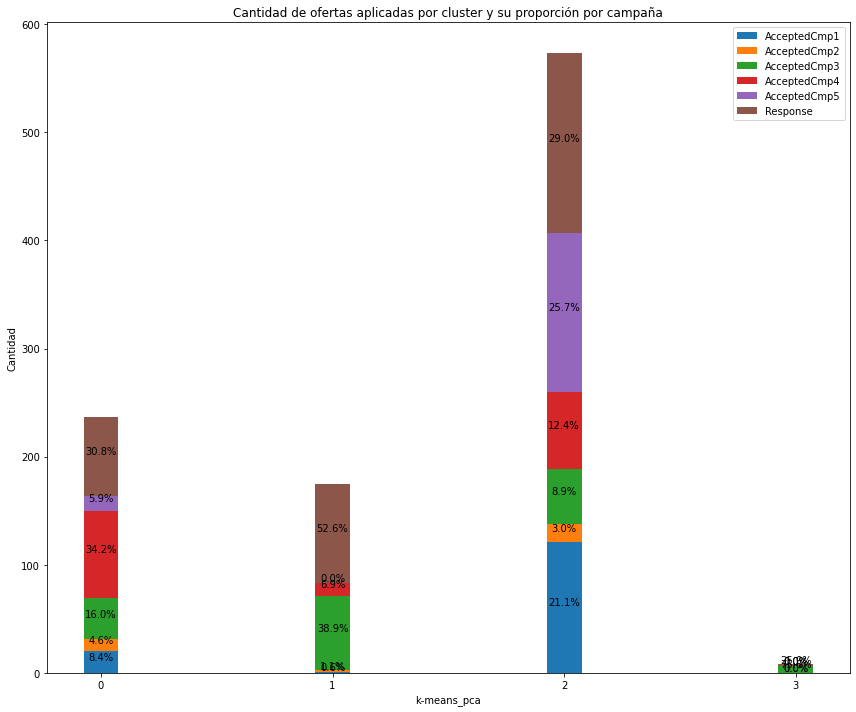

In [ ]:
# Creamos df con los la cantidad de produtos vendidos por tipo de descuento 

df_AcceptedCmp1 = df[['AcceptedCmp1','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_AcceptedCmp2 = df[['AcceptedCmp2','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_AcceptedCmp3 = df[['AcceptedCmp3','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_AcceptedCmp4 = df[['AcceptedCmp4','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_AcceptedCmp5 = df[['AcceptedCmp5','k-means_pca']].groupby('k-means_pca').sum().reset_index()
df_Response = df[['Response','k-means_pca']].groupby('k-means_pca').sum().reset_index()


# Datos del DataFrame
k_means_pca = ['0','1','2','3']
AcceptedCmp = [
    df_AcceptedCmp1['AcceptedCmp1'].values,
    df_AcceptedCmp2['AcceptedCmp2'].values,
    df_AcceptedCmp3['AcceptedCmp3'].values,
    df_AcceptedCmp4['AcceptedCmp4'].values,
    df_AcceptedCmp5['AcceptedCmp5'].values,
    df_Response['Response'].values
]

totals = np.sum(AcceptedCmp, axis=0)

fig, ax = plt.subplots(figsize=(12, 10))

index = np.arange(len(k_means_pca))
bar_width = 0.15

bottom = np.zeros(len(k_means_pca))
labels = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
bars = []

for i in range(len(AcceptedCmp)):
    bar = ax.bar(index, AcceptedCmp[i], bar_width, bottom=bottom, label=labels[i])
    bottom += AcceptedCmp[i]
    bars.append(bar)

ax.set_xlabel('k-means_pca')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de ofertas aplicadas por cluster y su proporción por campaña')
ax.set_xticks(index)
ax.set_xticklabels(k_means_pca)
ax.legend()

# Agregar etiquetas de porcentajes
def add_labels(rects, heights, totals):
    for rect, height, total in zip(rects, heights, totals):
        height_accumulated = rect.get_height()
        percentage = (height_accumulated / total) * 100
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_y() + height_accumulated / 2,
            f'{percentage:.1f}%',
            ha='center',
            va='bottom'
        )

for i in range(len(bars)):
    cumulative_heights = np.sum(AcceptedCmp[:i+1], axis=0)
    add_labels(bars[i], cumulative_heights, totals)

plt.tight_layout()
plt.show()


In [ ]:
df_ventas_canales=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','k-means_pca']].groupby('k-means_pca').sum().reset_index()

df_ventas_canales=df_ventas_canales.melt(
    id_vars='k-means_pca'
    ,value_vars=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
    ,var_name='tipo_canal'
    ,value_name='cantidad'
    )

total=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','k-means_pca']].groupby('k-means_pca')[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sum(axis=1).reset_index().rename(columns={0:'total'})
total
# df_ventas_canales['proba']=df_ventas_canales
df_ventas_canales=df_ventas_canales.merge(total, on='k-means_pca')
df_ventas_canales['proba']=(df_ventas_canales['cantidad']/df_ventas_canales['total'])*100
df_ventas_canales


# df_ventas_canales['proba']=(df_ventas_canales['cantidad']/df_ventas_canales.merge(total, on='k-means_pca')['total'])*100
# df_ventas_canales.sort_values('k-means_pca')


k-means_pca           tipo_canal  cantidad  total      proba
0             0      NumWebPurchases      3880  10413  37.261116
1             0  NumCatalogPurchases      1860  10413  17.862288
2             0    NumStorePurchases      4673  10413  44.876597
3             1      NumWebPurchases      2060   5704  36.115007
4             1  NumCatalogPurchases       526   5704   9.221599
5             1    NumStorePurchases      3118   5704  54.663394
6             2      NumWebPurchases      3001  11399  26.326871
7             2  NumCatalogPurchases      3499  11399  30.695675
8             2    NumStorePurchases      4899  11399  42.977454
9             3      NumWebPurchases       102    282  36.170213
10            3  NumCatalogPurchases        26    282   9.219858
11            3    NumStorePurchases       154    282  54.609929

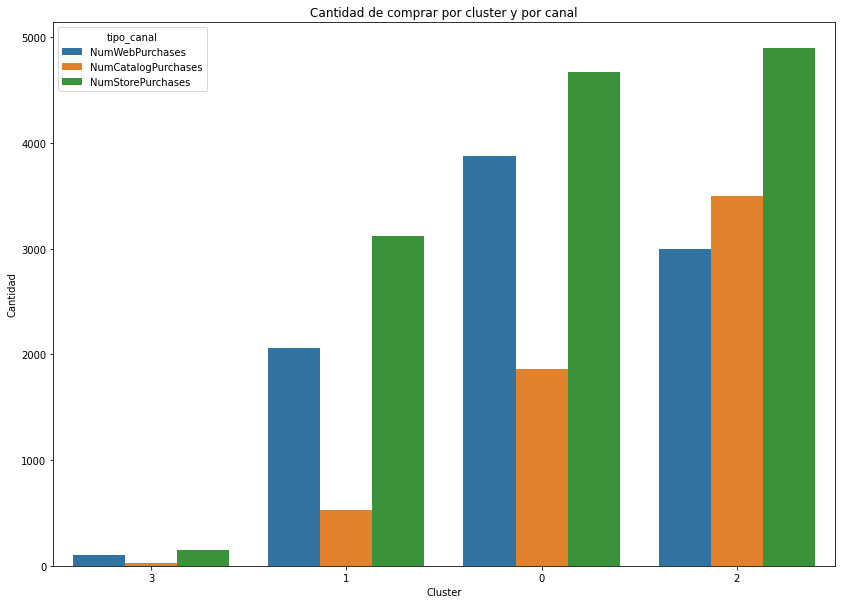

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_ventas_canales,
    x='k-means_pca',
    y='cantidad',
    hue='tipo_canal',
    order=orden
)

plt.ylabel('Cantidad')
plt.xlabel('Cluster')

plt.title('Cantidad de comprar por cluster y por canal')
plt.show()

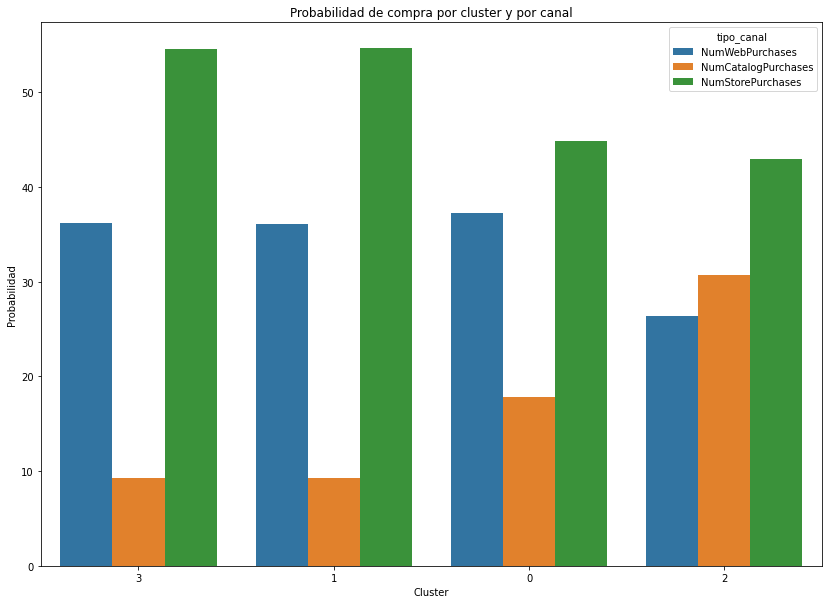

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.barplot(
    data=df_ventas_canales,
    x='k-means_pca',
    y='proba',
    hue='tipo_canal',
    order=orden
)

plt.ylabel('Probabilidad')
plt.xlabel('Cluster')

plt.title('Probabilidad de compra por cluster y por canal')
plt.show()

In [ ]:
df['k-means_pca'].value_counts()

1    964
0    613
2    581
3     54
Name: k-means_pca, dtype: int64

In [ ]:
df_visitas_web=df.groupby('k-means_pca')['NumWebVisitsMonth'].mean().reset_index()

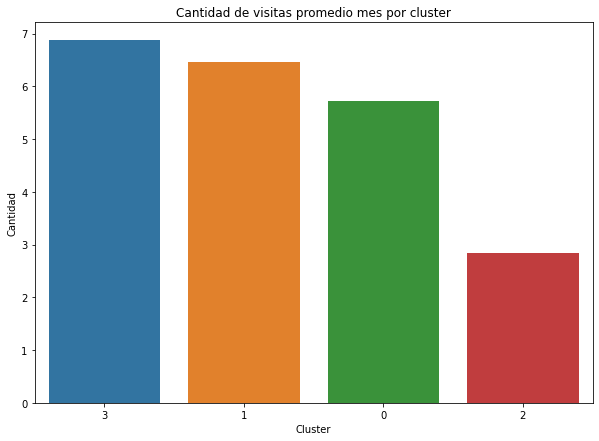

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.barplot(
    data=df.groupby('k-means_pca').mean().reset_index()[['k-means_pca','NumWebVisitsMonth']],
    x='k-means_pca',
    y='NumWebVisitsMonth',
    order=orden
)

plt.ylabel('Cantidad')
plt.xlabel('Cluster')

plt.title('Cantidad de visitas promedio mes por cluster')
plt.show()

In [ ]:
df_ingresos=df[['k-means_pca','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','Income']].copy()
df_ingresos['TotalSpent'] = df_ingresos[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']].sum(axis=1)
df_ingresos


k-means_pca  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0               2       635         88              546              172   
1               1        11          1                6                2   
2               2       426         49              127              111   
3               1        11          4               20               10   
4               1       173         43              118               46   
...           ...       ...        ...              ...              ...   
2235            0       709         43              182               42   
2236            0       406          0               30                0   
2237            2       908         48              217               32   
2238            0       428         30              214               80   
2239            1        84          3               61                2   

      MntGoldProds   Income  TotalSpent  
0               88  58138.0        1529  
1                6  46344.0          26  
2               42  71613.0         755  
3                5  26646.0          50  
4               15  58293.0         395  
...            ...      ...         ...  
2235           247  61223.0        1223  
2236             8  64014.0         444  
2237            24  56981.0        1229  
2238            61  69245.0         813  
2239            21  52869.0         171  

[2212 rows x 8 columns]

In [ ]:
# Asegurarte de que 'k-means_pca' sea categórico
df_ingresos['k-means_pca'] = df_ingresos['k-means_pca'].astype(str)

# Crear los gráficos de dispersión
fig1 = px.scatter(
    df_ingresos, 
    x='Income', 
    y='TotalSpent'
)

# Crear un gráfico de dispersión con color para clusters, sin barra de transición
fig2 = px.scatter(
    df_ingresos, 
    x='Income', 
    y='TotalSpent', 
    color='k-means_pca',
    color_discrete_sequence=['red', 'blue', 'green', 'purple']  # Especificar colores discretos

)

fig2.update_traces(marker=dict(size=4))  # Ajustar el tamaño de los puntos
fig1.update_traces(marker=dict(size=4))

# Crear la figura con subplots
fig = sp.make_subplots(rows=1, cols=2, shared_yaxes=True,  # Compartir el eje y
                       subplot_titles=('Sin clusters', 'Con clusters'))

# Agregar el primer gráfico al subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Agregar el segundo gráfico al subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Ajustar el tamaño y el diseño de la figura
fig.update_layout(
    width=1300, 
    height=600,
    title_text='Relación entre ingresos y ventas en dinero',
    title_x=0.5,  # Centrar el título horizontalmente
    title_y=0.95, # Ajustar la posición vertical del título
    title_font_size=24
)

# Agregar títulos a los ejes
fig.update_xaxes(title_text='Ingresos Anuales', row=1, col=1)
fig.update_xaxes(title_text='Ingresos Anuales', row=1, col=2)
fig.update_yaxes(title_text='Ventas (Dinero)', row=1, col=1)

# Mostrar el gráfico
fig.show()


## Aplicando Conglomerados jerárquicos - Ward

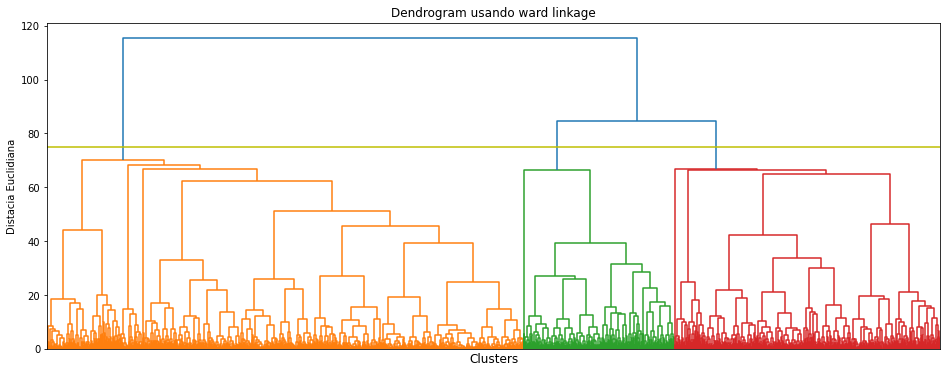

In [ ]:
fig = plt.figure(figsize=(16,6))
dendrogram_plto = dendrogram(linkage(pca_data_standar, method='ward'))

plt.title('Dendrogram usando ward linkage')
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Distacia Euclidiana')
plt.axhline(y=75, color='y', linestyle='-')
plt.xticks([])
plt.show()

<h5> Se identifica visualmente que la cantidad de clusters mas adecuado usando este modelo son 3</h5> 

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean' , linkage='ward') #affinity='euclidieadn' es el tipo de distacia que evaluo en el modelo y linkage='ward' es el metodo que uso para clusterizar (encontrar el grupo mas cercano)
y_hc = hc.fit_predict(pca_data_standar)

In [ ]:
df['agglomerativeClustering']=y_hc

### Evaluamos el comportamiento del conglomerado jerarquico

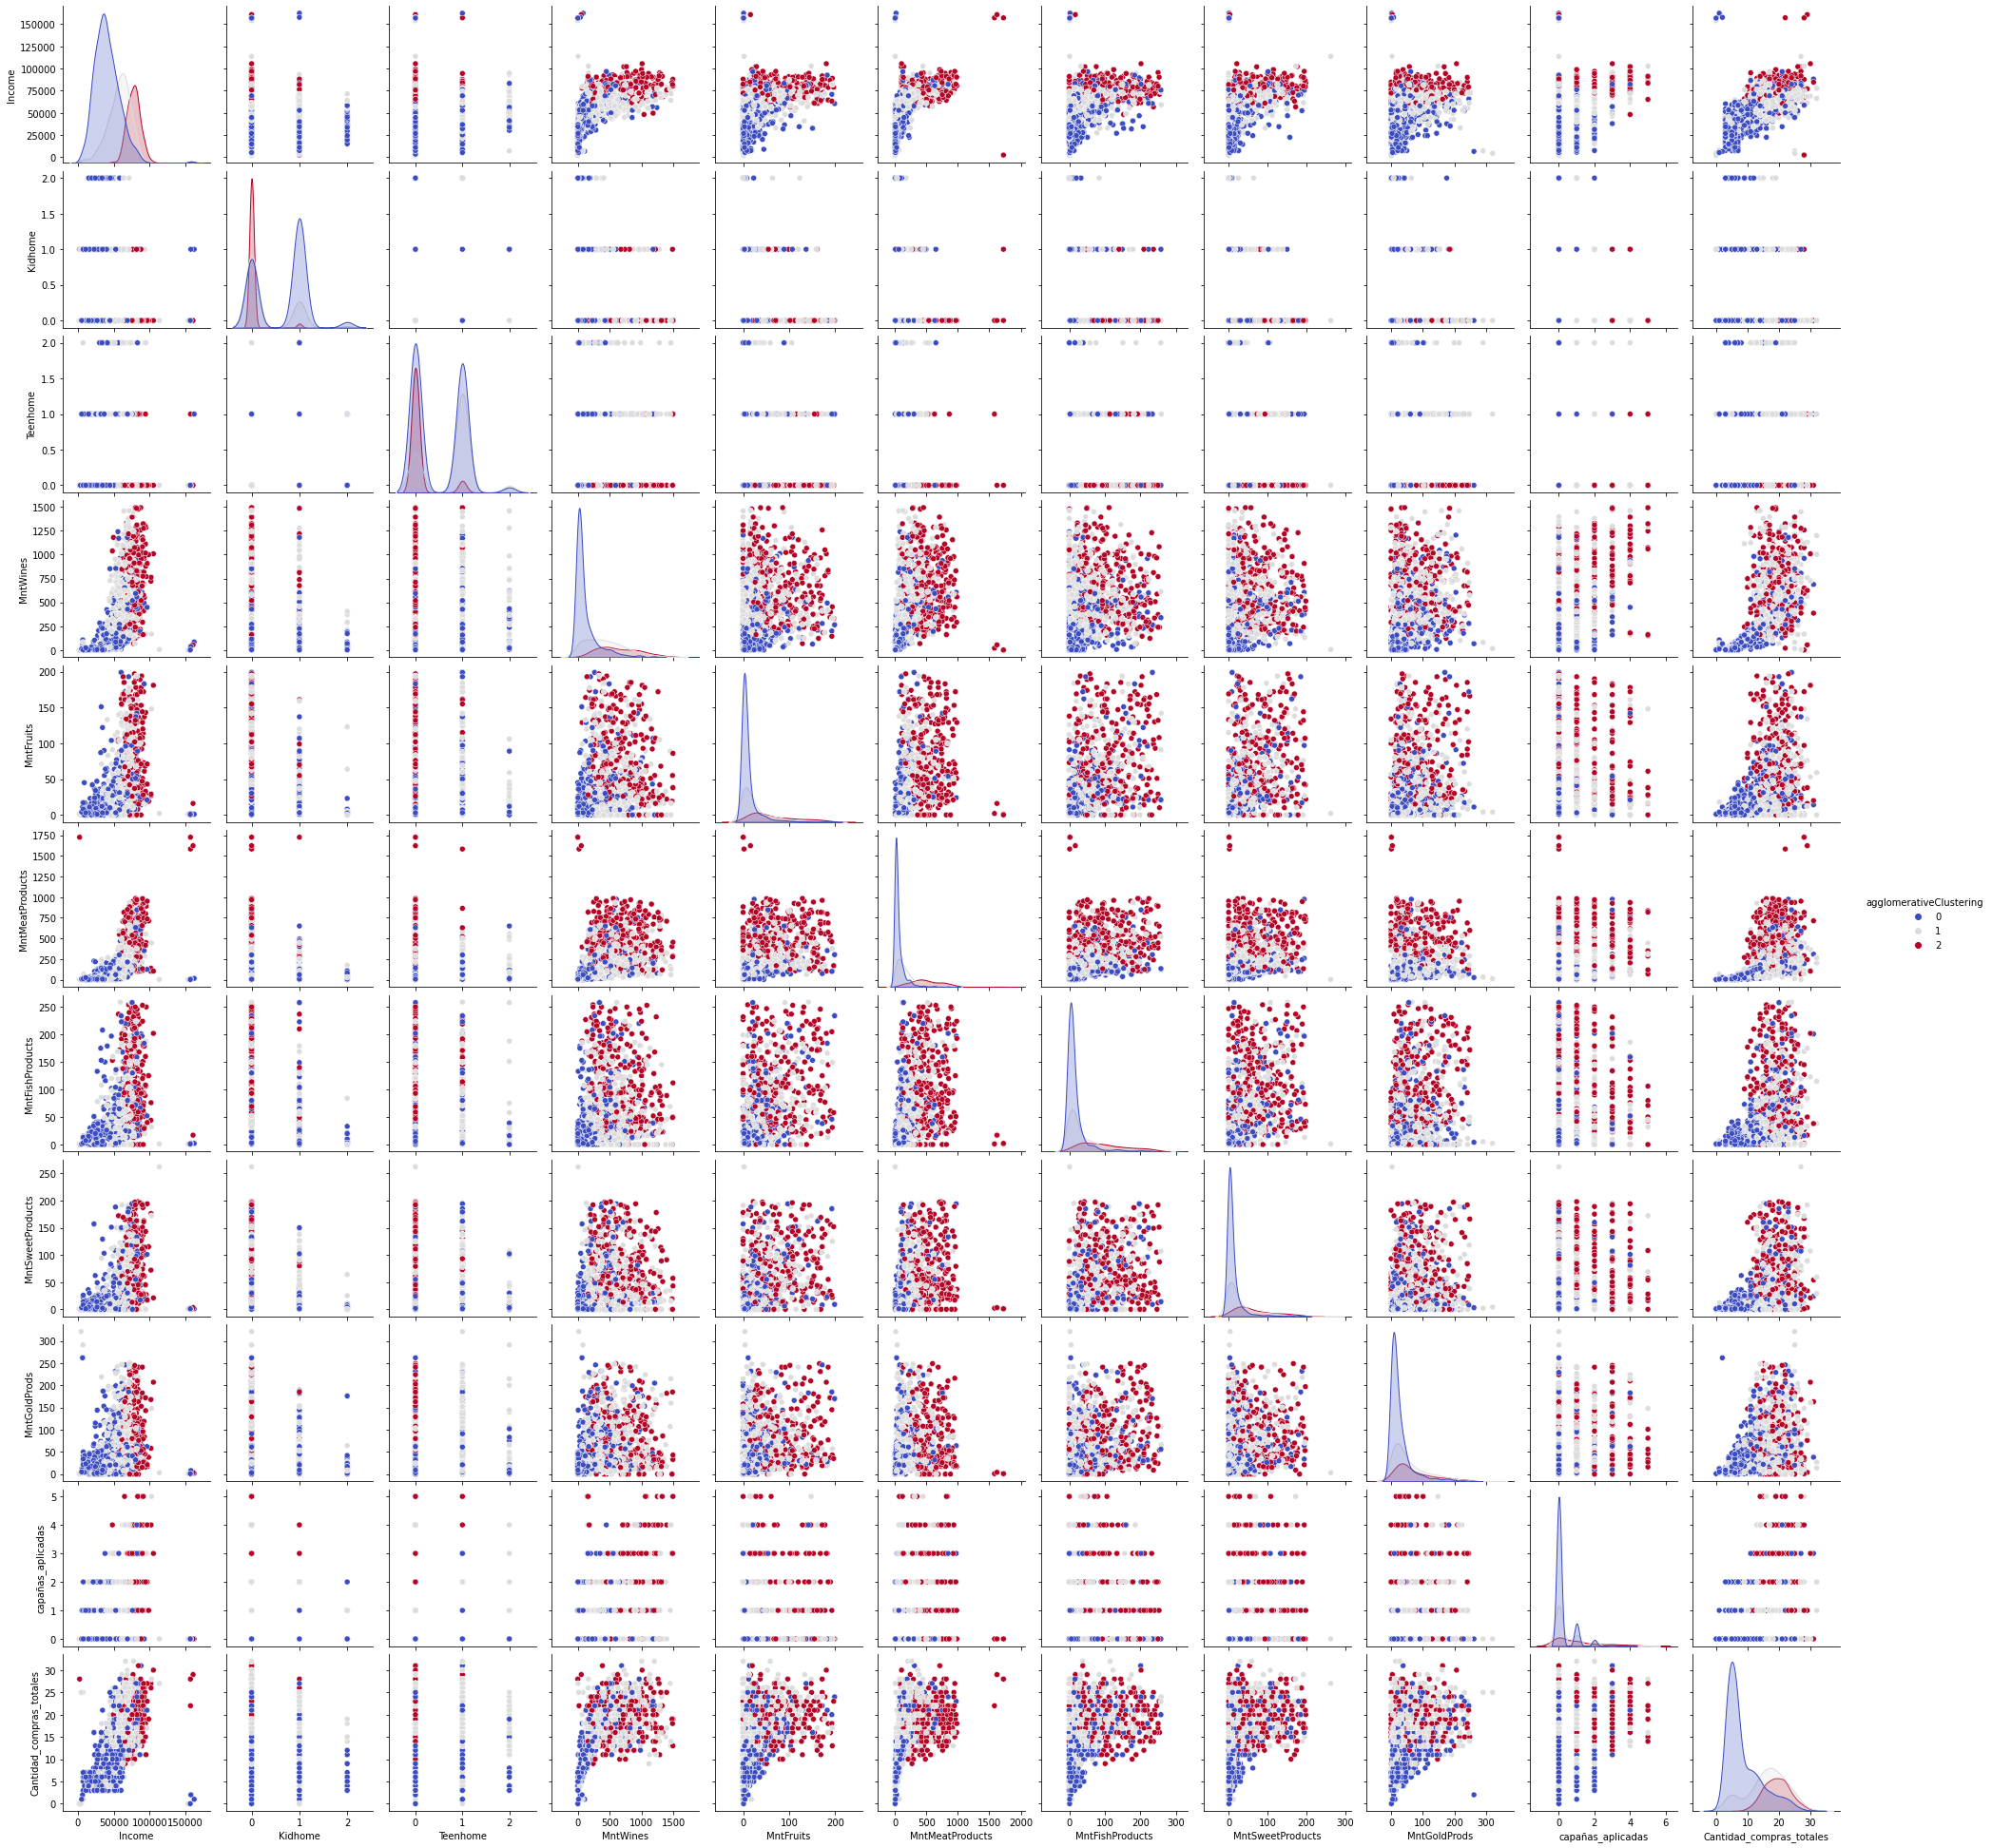

In [ ]:
sns.pairplot(
    df[['Income', 'Kidhome','Teenhome','agglomerativeClustering','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','capañas_aplicadas','Cantidad_compras_totales']], 
    hue='agglomerativeClustering',
    palette='coolwarm')
plt.show()


In [ ]:
silhouette_score(pca_data_standar,y_hc)

0.12446029759523593

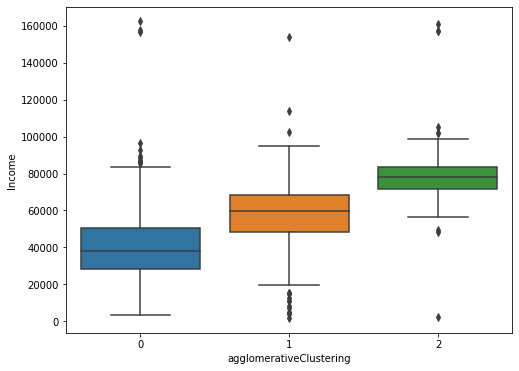

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    y='Income',
    x='agglomerativeClustering',
)
plt.show()

## Conclusiones y resultados

<h5> 
<b>Se identifica que los mejores resultados se tienen con el modelo de K-Means, ya sea por la metrica del indide de silueta o por el analisis de relación entre variables<b>
</h5>

In [ ]:
try:
    # Se elimina la columna 
    df = df.drop(columns=['agglomerativeClustering'])
    display(df.head())
except KeyError:
    display(df.head())

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
0  04-09-2012       58       635         88  ...             0         0   
1  08-03-2014       38        11          1  ...             0         0   
2  21-08-2013       26       426         49  ...             0         0   
3  10-02-2014       26        11          4  ...             0         0   
4  19-01-2014       94       173         43  ...             0         0   

   Response                                generacion  generacion_num  \
0         1                4_Baby Boomers_1946 a 1964               4   
1         0                4_Baby Boomers_1946 a 1964               4   
2         0                5_Generación X_1965 a 1980               5   
3         0  6_Generación Y o Millennials_1981 a 1996               6   
4         0  6_Generación Y o Millennials_1981 a 1996               6   

   tiene_hijos  Cantidad_compras_totales  capañas_aplicadas  tiene_pareja  \
0            0                        22                  1       soltero   
1            1                         4                  0       soltero   
2            0                        20                  0        Pareja   
3            1                         6                  0        Pareja   
4            1                        14                  0        Pareja   

   k-means_pca  
0            2  
1            1  
2            2  
3            1  
4            1  

[5 rows x 33 columns]

<h5> Por ultimo de construye un df a forma de resumen con las mas relevantes caracteristicas que se han podido identificar a partir de la clusterización, tomandon como criterios las caracteristicas de los segmentos en cuanto a productos, personas(clientes), promociones y canales de venta </h5> 

In [ ]:
# Establesemos los ragos para los ingresos de cada cluster, basandonos en sus primer y tercer cuartil
inferior_ingresos=df.groupby('k-means_pca')[['Income']].quantile(0.20).reset_index()
superior_ingresos=df.groupby('k-means_pca')[['Income']].quantile(0.80).reset_index()

#Incluimos la probabilidad de tener un niño en casa por cluster
df_clusters=ninos_casa[['k-means_pca','proba']].rename(columns={'proba':'probabilidad de tener al menos un niño en casa'})
df_clusters=df_clusters.merge(inferior_ingresos, on='k-means_pca',).rename(columns={'Income':'ingresos inferiores'})
df_clusters=df_clusters.merge(superior_ingresos, on='k-means_pca').rename(columns={'Income':'ingresos superiores'})

# Incluimos la probabilidad de cada nivel de educacion por cluster 
for i in df_nivel_educacion['Education'].unique():
    df_clusters=df_clusters.merge(df_nivel_educacion[df_nivel_educacion['Education']==i][['k-means_pca','proba']], on='k-means_pca', how='left').rename(columns={'proba':f'proba nivel academico {i}'})

# Inculimos la proabilidad de compra de cada uno de los tipos de productos por cluster
for i in df_ventas_productos['tipo_producto'].unique():
    df_clusters=df_clusters.merge(df_ventas_productos[df_ventas_productos['tipo_producto']==i][['k-means_pca','proba']], on='k-means_pca').rename(columns={'proba':f'proba de comprar {i}'})

# Inculimos el promedio de visitas mensuales a la web por cluster
df_clusters=df_clusters.merge(df.groupby('k-means_pca').mean().reset_index()[['k-means_pca','NumWebVisitsMonth']].rename(columns={'NumWebVisitsMonth':'cantidad de visitas web promedio al mes'}),on='k-means_pca')

# Inculimos la probabilidad de que cada culster compre por los diferentes canales de venta
df_ventas_canales=df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','k-means_pca']].groupby('k-means_pca').sum().reset_index()
canales=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
df_ventas_canales['total']=df_ventas_canales[canales].sum(axis=1)

for i in canales:
    df_ventas_canales[i]=(df_ventas_canales[i]/df_ventas_canales['total'])*100

df_ventas_canales.drop(columns='total', inplace=True)

df_clusters=df_clusters.merge(df_ventas_canales, on='k-means_pca')

# Incluimos la probabilidad de que cada cluster aplique a una df_campaña
df_clusters=df_clusters.merge(df.groupby('k-means_pca').describe()['capañas_aplicadas'].reset_index()[['k-means_pca','mean']].rename(columns={'mean':'proba de aplicar a una campaña'}),on='k-means_pca')
df_clusters['proba de aplicar a una campaña']=df_clusters['proba de aplicar a una campaña']*100

# Incluimos la probabilidad de que apliquen en campañas como las que se tiene registro
df_campañas = pd.concat([
    df_AcceptedCmp1.set_index('k-means_pca'),
    df_AcceptedCmp2.set_index('k-means_pca'),
    df_AcceptedCmp3.set_index('k-means_pca'),
    df_AcceptedCmp4.set_index('k-means_pca'),
    df_AcceptedCmp5.set_index('k-means_pca'),
    df_Response.set_index('k-means_pca')
], axis=1).reset_index()

campanias=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Se renombrean varias columnas por para que sea mas clara la comunicacion de sus datos
df_campañas['total']=df_campañas[campanias].sum(axis=1)

for i in campaigns:
    df_campañas[i]=(df_campañas[i]/df_campañas['total'])*100

df_campañas.drop(columns='total',inplace=True)

df_clusters=df_clusters.merge(df_campañas,on='k-means_pca')

df_clusters.rename(columns=
        {
            "NumWebPurchases":"proba de compras web",
            "NumCatalogPurchases":"proba de compras por catalogo",
            "NumStorePurchases":"proba de compras por tienda",
            "AcceptedCmp1":"proba de camapana 1",
            "AcceptedCmp2":"proba de camapana 2",
            "AcceptedCmp3":"proba de camapana 3",
            "AcceptedCmp4":"proba de camapana 4",
            "AcceptedCmp5":"proba de camapana 5",
            "Response":"proba de la ultima camapana",
        }
    ,inplace=True)


df_clusters.sort_values('ingresos inferiores', ascending=True)


k-means_pca  probabilidad de tener al menos un niño en casa  \
3            3                                       62.962963   
1            1                                       76.348548   
0            0                                       22.185971   
2            2                                        4.302926   

   ingresos inferiores  ingresos superiores  proba nivel academico 2n Cycle  \
3              14990.0              25548.6                             NaN   
1              24699.8              44794.0                       11.307054   
0              49156.4              66405.6                        5.546493   
2              68142.0              83151.0                        9.466437   

   proba nivel academico Graduation  proba nivel academico Master  \
3                               NaN                           NaN   
1                         53.008299                     16.493776   
0                         43.719413                     20.880914   
2                         57.831325                     13.425129   

   proba nivel academico PhD  proba nivel academico Basic  \
3                        NaN                        100.0   
1                  19.190871                          NaN   
0                  29.853181                          NaN   
2                  19.277108                          NaN   

   proba de comprar MntWines  ...  proba de compras web  \
3                   8.852162  ...             36.170213   
1                  43.149263  ...             36.115007   
0                  63.824900  ...             37.261116   
2                  43.800709  ...             26.326871   

   proba de compras por catalogo  proba de compras por tienda  \
3                       9.219858                    54.609929   
1                       9.221599                    54.663394   
0                      17.862288                    44.876597   
2                      30.695675                    42.977454   

   proba de aplicar a una campaña  proba de camapana 1  proba de camapana 2  \
3                       14.814815             0.000000             0.000000   
1                       18.153527             0.571429             1.142857   
0                       38.662316             8.438819             4.641350   
2                       98.623064            21.116928             2.966841   

   proba de camapana 3  proba de camapana 4  proba de camapana 5  \
3            75.000000             0.000000             0.000000   
1            38.857143             6.857143             0.000000   
0            16.033755            34.177215             5.907173   
2             8.900524            12.390925            25.654450   

   proba de la ultima camapana  
3                    25.000000  
1                    52.571429  
0                    30.801688  
2                    28.970332  

[4 rows x 26 columns]

<h5><b>Cluster 0</b></h5>
<h5>
    <li>
    Baja probabilidad de que el cliente tenga al menos un niño en casa (22,1% de proba)
    </li>
    <li>
    Rango de ingresos aproximados entre $50.729 y $65.176
    </li>
    <li>
    Lo mas probable es que tenga un nivel academico de grado o en menor probabilidad de PHD o master, en ese orden
    </li>
    <li>
    Lo mas probable es que compre productos de vino (63.8% de proba) o productos de carne (18.2%) o pescado, en ese orden
    </li>
    <li>
    Tiene una frecuencia promedio de visitas web de 5.7 veces al mes, siendo el tercer tipo de cliente que mas visitas hace
    </li>
    <li>
    Es muy probable que este tipo de cliente compre por la tienda (44,8% de proba) o por la web (37,2% de proba)
    </li>
    <li>
    No es tan probable que aplique a una campaña, siendo el segundo tipo de cliente que mas aplica a las campañas pero con una probanilidad del 38,6%
    </li>
    <li>
    Y de llegar a aplicar a una campaña, lo mas probable es que este tipo de cliente aplique a campañas como la 4 o la ultima, en ese orden
    </li>
</h5>


<h5><b>Cluster 1</b></h5>
<h5>
    <li>
    Alta probabilidad de que el cliente tenga al menos un niño en casa (76,3% de proba)
    </li>
    <li>
    Rango de ingresos aproximados entre $27.017 y $42.586
    </li>
    <li>
    Lo mas probable es que tenga un nivel academico de grado o en menor probabilidad de PHD o master, en ese orden
    </li>
    <li>
    Lo mas probable es que compre productos de vino (43.1% de proba) o productos de carne o pescado, en ese orden
    </li>
    <li>
    Tiene una frecuencia promedio de visitas web de 6 veces al mes, siendo el segundo tipo de cliente que mas visitas hace
    </li>
    <li>
    Es muy probable que este tipo de cliente compre por la tienda (54,6% de proba) o por la web (36,1% de proba)
    </li>
    <li>
    Es poco probable que aplique a una campaña, siendo el segundo tipo de cliente que menos aplica a las campañas
    </li>
    <li>
    Y de llegar a aplicar a una campaña, lo mas probable es que este tipo de cliente aplique a campañas como la ultima realizada o la tercera, en ese orden
    </li>
</h5>


<h5><b>Cluster 2</b></h5>
<h5>
    <li>
    Muy baja probabilidad de que el cliente tenga un niño en casa (4,3% de proba)
    </li>
    <li>
    Rango de ingresos aproximados entre $ 69.867 y $ 82.032
    </li>
    <li>
    Lo mas probable es que tenga un nivel academico de grado o en menor probabilidad de PHD o master, en ese orden
    </li>
    <li>
    Lo mas probable es que compre productos de vino (43.8% de proba) o productos de carne o pescado, en ese orden
    </li>
    <li>
    Tiene una frecuencia promedio de visitas web de 3 veces al mes, siendo el tipo de cliente que menos visitas hace
    </li>
    <li>
    Es muy probable que este tipo de cliente compre por la tienda (42,9% de proba) o por catalogo (30,6% de proba)
    </li>
    <li>
    Es muy probable que aplique a una campaña, siendo el tipo de cliente que mas aplica a las campañas
    </li>
    <li>
    Este tipo de cliente no tiene una campaña bien marcada como su preferida, pero lo mas probable es que aplique a campañas como la ultima, la 5 o la primera, es ese orden
    </li>
</h5>

<h5><b>Cluster 3</b></h5>
<h5>
    <li>
    Media alta probabilidad de que el cliente tenga un niño en casa (62,9% de proba)
    </li>
    <li>
    Rango de ingresos aproximados entre $15.405 y $24.882
    </li>
    <li>
    es muy probable que tenga un nivel academico basico
    </li>
    <li>
    Lo mas probable es que compre productos de Oro (27.9% de proba) o productos de pescado (20.8% de proba) o frutas, en ese orden
    </li>
    <li>
    Tiene una frecuencia promedio de visitas web de 6.8 veces al mes, siendo el tipo de cliente que mas visitas hace
    </li>
    <li>
    Es muy probable que este tipo de cliente compre por la tienda (54,6% de proba) o por web (26,3% de proba)
    </li>
    <li>
    Es muy poco probable que no aplique a una campaña, siendo el tipo de cliente que menos aplica a las campañas (14.8 de proba)
    </li>
    <li>
    Y de llegar a aplicar a una campaña, lo mas probable es que este tipo de cliente aplique a la campaña 4 o a la ultima, en ese orden
    </li>
</h5>